# **Allstate Claims Severity**







### **Problem Statement**

> a.	Predict cost of an insurance claim and thus determine its severity based on claimed cost.


> b.	Since we are predicting repair cost (loss) which is of numeric type so we can pose this problem as ‘Regression’ problem





## **Real world/Business Objectives and Constraints**

> The cost of a mis-prediction can be quite high.

> No strict latency concerns.

> Interpretability is partially important.







## **Type of Machine Leaning Problem**

> •	It is a regression problem. It is also a Supervised Machine learning problem as we target values for train data



## **Data Overview**


> a.	There are two files namely train.csv and test.csv

1.   **Train.csv**: the training set. Size: 66.78 MB
2.   **Test.csv** - the test set. You must predict the loss value for the ids in this file. Size: 43.6 MB

> b.	The train dataset has 130 features - 116 are categorical, and 14 are real-valued features. There is a loss associated with each training example. There are 188,318 training examples

> c.	The test dataset has same feature sets but no ‘loss’ (dependent variable).We have to predict loss in test set










## **Performance Metric**

> a.	MAE (mean absolute error)

> b.	RMSE (Root Mean Square Error)





## 1. Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats 
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
import os
import gc
import pylab

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')
data_train.head()

id cat1 cat2 cat3 cat4  ...    cont11    cont12    cont13    cont14     loss
0   1    A    B    A    B  ...  0.569745  0.594646  0.822493  0.714843  2213.18
1   2    A    B    A    A  ...  0.338312  0.366307  0.611431  0.304496  1283.60
2   5    A    B    A    A  ...  0.381398  0.373424  0.195709  0.774425  3005.09
3  10    B    B    A    B  ...  0.327915  0.321570  0.605077  0.602642   939.85
4  11    A    B    A    B  ...  0.204687  0.202213  0.246011  0.432606  2763.85

[5 rows x 132 columns]

In [4]:
data_test.head()

id cat1 cat2 cat3 cat4  ...   cont10    cont11    cont12    cont13    cont14
0   4    A    B    A    A  ...  0.38016  0.377724  0.369858  0.704052  0.392562
1   6    A    B    A    B  ...  0.60401  0.689039  0.675759  0.453468  0.208045
2   9    A    B    A    B  ...  0.30529  0.245410  0.241676  0.258586  0.297232
3  12    A    A    A    A  ...  0.31480  0.348867  0.341872  0.592264  0.555955
4  15    B    A    A    A  ...  0.50556  0.359572  0.352251  0.301535  0.825823

[5 rows x 131 columns]

In [5]:
print('Shape of train dataset',data_train.shape)
print('Shape of test dataset',data_test.shape)

Shape of train dataset (188318, 132)
Shape of test dataset (125546, 131)


Here we print shape of train and test data.We can see that we have 132 features in train and 131 features in test.
In test we have all features like in train set except 'loss' variable

In [6]:
categorical_features_train = list(data_train.select_dtypes(include=['object']).columns)
print("Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(data_train.select_dtypes(include=['float']).columns)
print("Continous features in Train data : {} features".format(len(continous_features_train)-1))

Categorical features in Train data : 116 features
Continous features in Train data : 14 features


In [7]:
categorical_features_test = list(data_test.select_dtypes(include=['object']).columns)
print("Categorical features in Test data : {} features".format(len(categorical_features_test)))
continous_features_test = list(data_test.select_dtypes(include=['float']).columns)
print("Continous features in Test data : {} features".format(len(continous_features_test)))

Categorical features in Test data : 116 features
Continous features in Test data : 14 features


In [8]:
print('Null value in train data: ',data_train.isnull().sum().sum())
print('Null value in test data: ',data_test.isnull().sum().sum())

Null value in train data:  0
Null value in test data:  0


In [9]:
unique_in_categorical =[]
for i in categorical_features_train:
  unique_in_categorical.append(len(data_train[i].unique()))
data_cat = dict(zip(categorical_features_train,unique_in_categorical))

In [10]:
max_cat = max(data_cat,key=data_cat.get)
print('maximum lavels is in {} which is {} .'.format(max_cat,data_cat.get(max_cat)))

maximum lavels is in cat116 which is 326 .


In [11]:
data_test.columns.values

array(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
       'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21',
       'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28',
       'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35',
       'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42',
       'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49',
       'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56',
       'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63',
       'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70',
       'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77',
       'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84',
       'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91',
       'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98',
       'cat99', 'cat100

In [12]:
#(data_train['cat1'].values == data_train['cat2'].values).all()

dup_list =[]
for i in range(len(data_train.columns.values)):
  for j in range(i+1,len(data_train.columns.values)):
    dup_list.append(data_train[data_train.columns.values[i]].equals(data_train[data_train.columns.values[j]]))
    
if (not any(dup_list)):    
  #print('duplicate column are {} and {}'.format(i,j))
  print('No duplicates columns in categorical features')
else:
  print('duplicate column are {} and {}'.format(i,j))


No duplicates columns in categorical features


**Counting numbers of levels in each categorical feature**

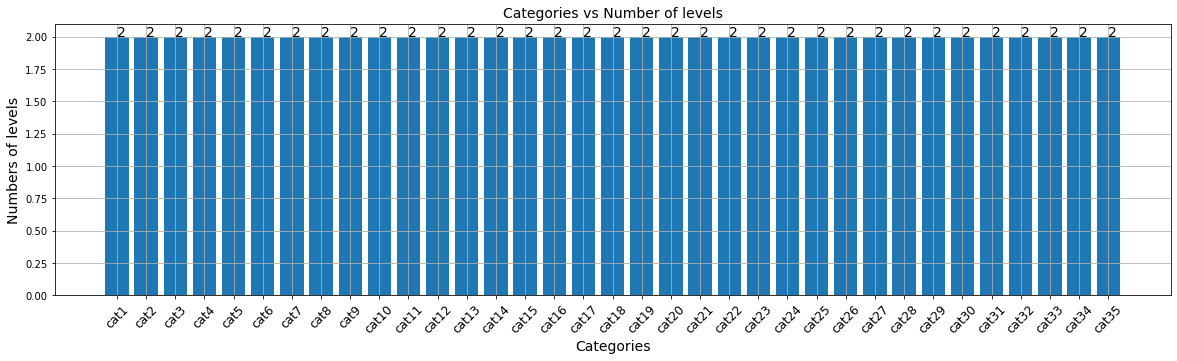

In [13]:
'''
count plot for Categories Vs Number of Levels in each categories
'''
fig = plt.figure(figsize =(20, 5))
plt.bar(categorical_features_train[:35],unique_in_categorical[:35])
plt.xlabel('Categories',fontsize=14)
plt.ylabel('Numbers of levels',fontsize=14)
plt.title('Categories vs Number of levels',fontsize=14)
plt.xticks(rotation = 45,size = 12)
plt.grid()
for i in range(35):
  plt.text(x = i , y = unique_in_categorical[i],s = unique_in_categorical[i],size = 14,rotation = 0)
plt.show()

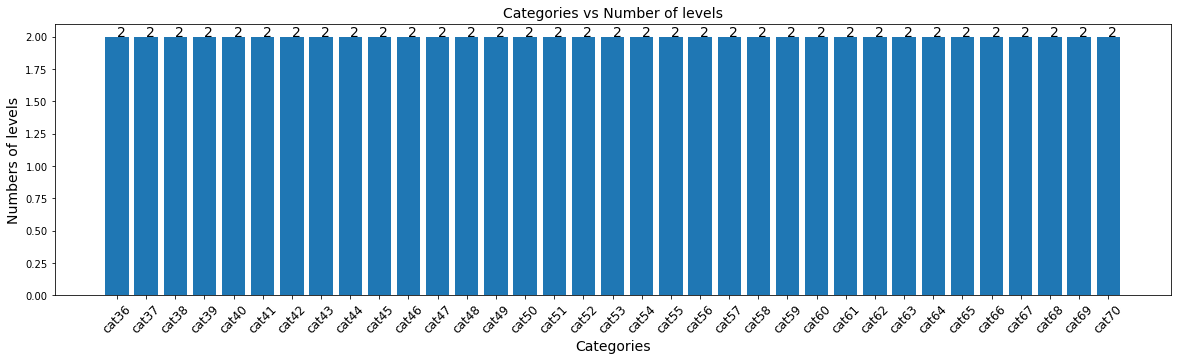

In [14]:
fig = plt.figure(figsize =(20, 5))
plt.bar(categorical_features_train[35:70],unique_in_categorical[35:70])
plt.xlabel('Categories',fontsize=14)
plt.ylabel('Numbers of levels',fontsize=14)
plt.title('Categories vs Number of levels',fontsize=14)
plt.xticks(rotation = 45,size = 12)
#plt.grid()
for i in range(35,70):
  plt.text(x = i-35 , y = unique_in_categorical[i],s = unique_in_categorical[i],size = 14,rotation = 0)
plt.show()

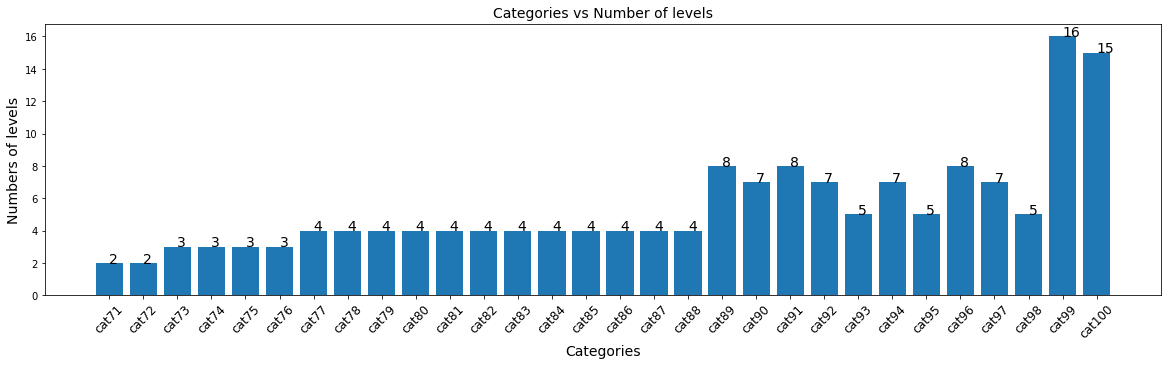

In [15]:
fig = plt.figure(figsize =(20, 5))
plt.bar(categorical_features_train[70:100],unique_in_categorical[70:100])
plt.xlabel('Categories',fontsize=14)
plt.ylabel('Numbers of levels',fontsize=14)
plt.title('Categories vs Number of levels',fontsize=14)
plt.xticks(rotation = 45,size = 12)
#plt.grid()

for i in range(70,100):
  plt.text(x = i-70 , y = unique_in_categorical[i],s = unique_in_categorical[i],size = 14,rotation = 0)
plt.show()

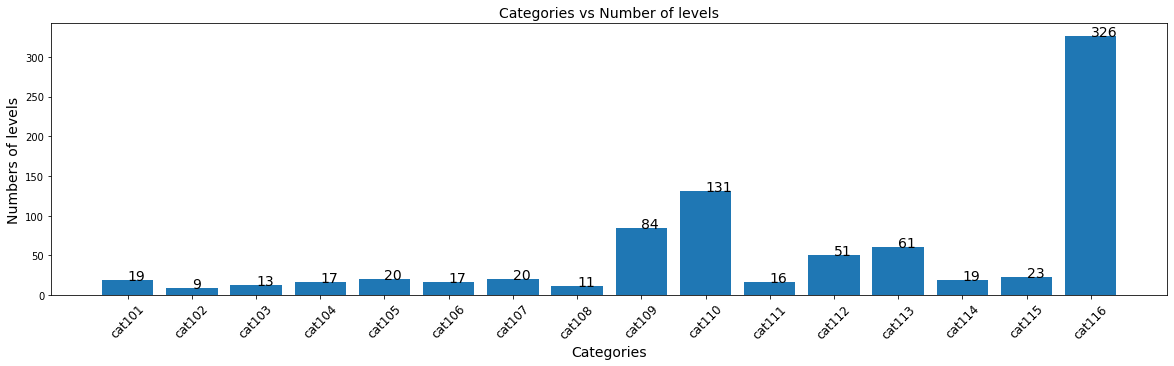

In [16]:
plt.close()
fig = plt.figure(figsize =(20, 5))
plt.bar(categorical_features_train[100:],unique_in_categorical[100:])
plt.xlabel('Categories',fontsize=14)
plt.ylabel('Numbers of levels',fontsize=14)
plt.title('Categories vs Number of levels',fontsize=14)
plt.xticks(rotation = 45,size = 12)
#plt.grid()
for i in range(100,116):
  plt.text(x = i-100 , y = unique_in_categorical[i],s = unique_in_categorical[i],size = 14,rotation = 0)
plt.show()

We can see from count plot that we have some categorical features with high cardinality.Most of features are bi-level features. So while using encoding technique we have to keepthis info in mind.

In [17]:
'''
Here we creating Dictionary for catehories and there frequency of levels in each categorical features
'''
feature_count_dict = {i : dict(data_train.groupby(i)['id'].count()) for i in categorical_features_train}

In [18]:
print('frequency of lavels in catt116 features is ',feature_count_dict['cat116'])

frequency of lavels in catt116 features is  {'AA': 4, 'AB': 2, 'AC': 85, 'AD': 1, 'AE': 1, 'AF': 32, 'AG': 6, 'AH': 1, 'AJ': 35, 'AK': 6, 'AL': 6, 'AM': 1, 'AN': 1, 'AO': 40, 'AP': 1, 'AR': 1, 'AS': 1, 'AT': 1, 'AU': 2, 'AV': 3, 'AW': 20, 'AX': 11, 'AY': 2, 'B': 14, 'BA': 10, 'BB': 1, 'BC': 1, 'BD': 290, 'BF': 1, 'BG': 1, 'BI': 1, 'BK': 10, 'BL': 1, 'BM': 2, 'BO': 101, 'BP': 279, 'BQ': 7, 'BS': 19, 'BT': 3, 'BU': 8, 'BV': 290, 'BW': 14, 'BX': 312, 'BY': 1620, 'C': 1, 'CA': 21, 'CB': 1909, 'CC': 2, 'CD': 300, 'CE': 16, 'CF': 87, 'CG': 238, 'CH': 35, 'CI': 1314, 'CJ': 2, 'CK': 10162, 'CL': 5, 'CM': 51, 'CN': 198, 'CO': 245, 'CP': 343, 'CQ': 33, 'CR': 6862, 'CS': 934, 'CT': 113, 'CU': 438, 'CV': 20, 'CW': 699, 'CX': 17, 'CY': 3, 'D': 2, 'DA': 43, 'DC': 4557, 'DD': 237, 'DE': 7, 'DF': 2519, 'DG': 27, 'DH': 454, 'DI': 448, 'DJ': 20244, 'DK': 684, 'DL': 51, 'DM': 33, 'DN': 174, 'DO': 7, 'DP': 9202, 'DQ': 1, 'DR': 8, 'DS': 553, 'DT': 54, 'DU': 100, 'DV': 3, 'DW': 103, 'DX': 73, 'DY': 1, 'E': 

Since we have 116 categorical feature and 14 continuous features. And we need to EDA on these features.So doing EDA on all features we will take some important features from Categorical features and some from continuous features.

So, How to select these features?

Here we use some features selection methods such as :

**a. Recursive feature Elemination** : This method use as wrapper .Here we have to choose some model which gives features importance and on top of that model REF will eliminate or select features.In this method we will get rank of each features.

**b. Feature Importance** : In this method we use ML Model that will give feature importance. Basically tree based model are used since in tree based mode feature importance is calculate using information gain of features.

So in both methods we have to use ML model so we have to convert categorical features into numeric features.So for that we used label encoding.

Label Encoding on categorical features:

In [186]:
train_data_lable_encoded = data_train.copy()
for i in categorical_features_train:
  train_data_lable_encoded [i] = pd.factorize(train_data_lable_encoded [i].values,sort = True)[0]
train_data_lable_encoded.head()

id  cat1  cat2  cat3  cat4  ...    cont11    cont12    cont13    cont14     loss
0   1     0     1     0     1  ...  0.569745  0.594646  0.822493  0.714843  2213.18
1   2     0     1     0     0  ...  0.338312  0.366307  0.611431  0.304496  1283.60
2   5     0     1     0     0  ...  0.381398  0.373424  0.195709  0.774425  3005.09
3  10     1     1     0     1  ...  0.327915  0.321570  0.605077  0.602642   939.85
4  11     0     1     0     1  ...  0.204687  0.202213  0.246011  0.432606  2763.85

[5 rows x 132 columns]

In [26]:
X_tr = train_data_lable_encoded.drop(['loss','id'],axis = 1)
y_tr =train_data_lable_encoded['loss']

X_tr.shape

(188318, 130)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor


rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=10)
rfe.fit(X_tr,y_tr)
#rfe.support_

RFE(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                    max_depth=None, max_features=None,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    presort='deprecated', random_state=None,
                                    splitter='best'),
    n_features_to_select=10, step=1, verbose=0)

In [ ]:
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_),X.columns.values)))

Features sorted by their rank:
[(1, 'cat100'), (1, 'cat101'), (1, 'cat57'), (1, 'cat80'), (1, 'cont1'), (1, 'cont11'), (1, 'cont14'), (1, 'cont2'), (1, 'cont6'), (1, 'cont7'), (2, 'cont8'), (3, 'cat79'), (4, 'cont13'), (5, 'cat112'), (6, 'cont5'), (7, 'cat12'), (8, 'cont3'), (9, 'cat114'), (10, 'cat81'), (11, 'cont12'), (12, 'cat111'), (13, 'cat103'), (14, 'cont9'), (15, 'cont4'), (16, 'cat110'), (17, 'cat113'), (18, 'cont10'), (19, 'cat72'), (20, 'cat116'), (21, 'cat87'), (22, 'cat105'), (23, 'cat91'), (24, 'cat1'), (25, 'cat107'), (26, 'cat83'), (27, 'cat82'), (28, 'cat115'), (29, 'cat53'), (30, 'cat102'), (31, 'cat93'), (32, 'cat84'), (33, 'cat90'), (34, 'cat108'), (35, 'cat36'), (36, 'cat106'), (37, 'cat27'), (38, 'cat99'), (39, 'cat76'), (40, 'cat38'), (41, 'cat92'), (42, 'cat104'), (43, 'cat37'), (44, 'cat26'), (45, 'cat23'), (46, 'cat2'), (47, 'cat109'), (48, 'cat97'), (49, 'cat73'), (50, 'cat95'), (51, 'cat13'), (52, 'cat11'), (53, 'cat75'), (54, 'cat44'), (55, 'cat94'), (56, '

Here we used f_regression score test for regression problem like we do chi test for clssification problem

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


X_new = SelectKBest(score_func=f_regression, k=20)
X_new.fit(X_tr,y_tr)


SelectKBest(k=20, score_func=<function f_regression at 0x7fd79314b1e0>)

<function matplotlib.pyplot.show>

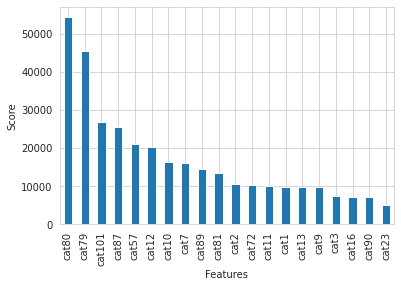

In [ ]:
score = pd.Series(X_new.scores_,index= X.columns)
score.nlargest(20).plot(kind = 'bar')
plt.ylabel('Score')
plt.xlabel('Features')
plt.show

Feature Importance by using ExtraTree regressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor

model  = ExtraTreesRegressor(n_estimators=50)
model.fit(X_tr,y_tr)

feature_imp = model.feature_importances_


<function matplotlib.pyplot.show>

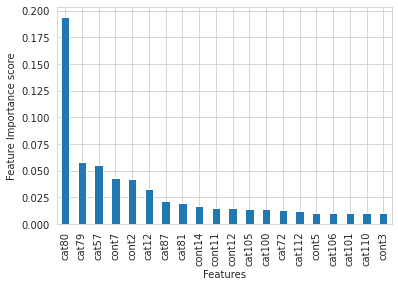

In [ ]:
ranked_feature = pd.Series(model.feature_importances_,index = X.columns)
ranked_feature.nlargest(20).plot(kind = 'bar')
plt.ylabel('Feature Importance score')
plt.xlabel('Features')
plt.show

Feature Importance by using Randomforest regressor

<function matplotlib.pyplot.show>

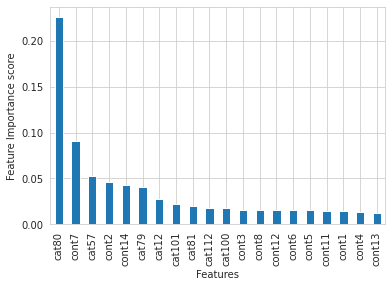

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
model1 = RandomForestRegressor(n_estimators=50)
model1.fit(X_tr,y_tr)
feature_imp1 = model1.feature_importances_

ranked_feature1 = pd.Series(model1.feature_importances_,index = X_tr.columns)
ranked_feature1.nlargest(20).plot(kind = 'bar')
plt.ylabel('Feature Importance score')
plt.xlabel('Features')
plt.show

Here we run simple Extratree regressor model to get important features.We select top 5 categorical features and 5 continious features.

We will select 'cat80','cat79','cat57','cat81' and 'cat101' as categorical features. And 'cont7','cont2','cont14','cont12' and 'cont11'.



### **Univariate and Bivariate Analysis of Important Categorical features:**

Text(0.5, 1.0, 'Boxplot for cat105 vs transformed loss')

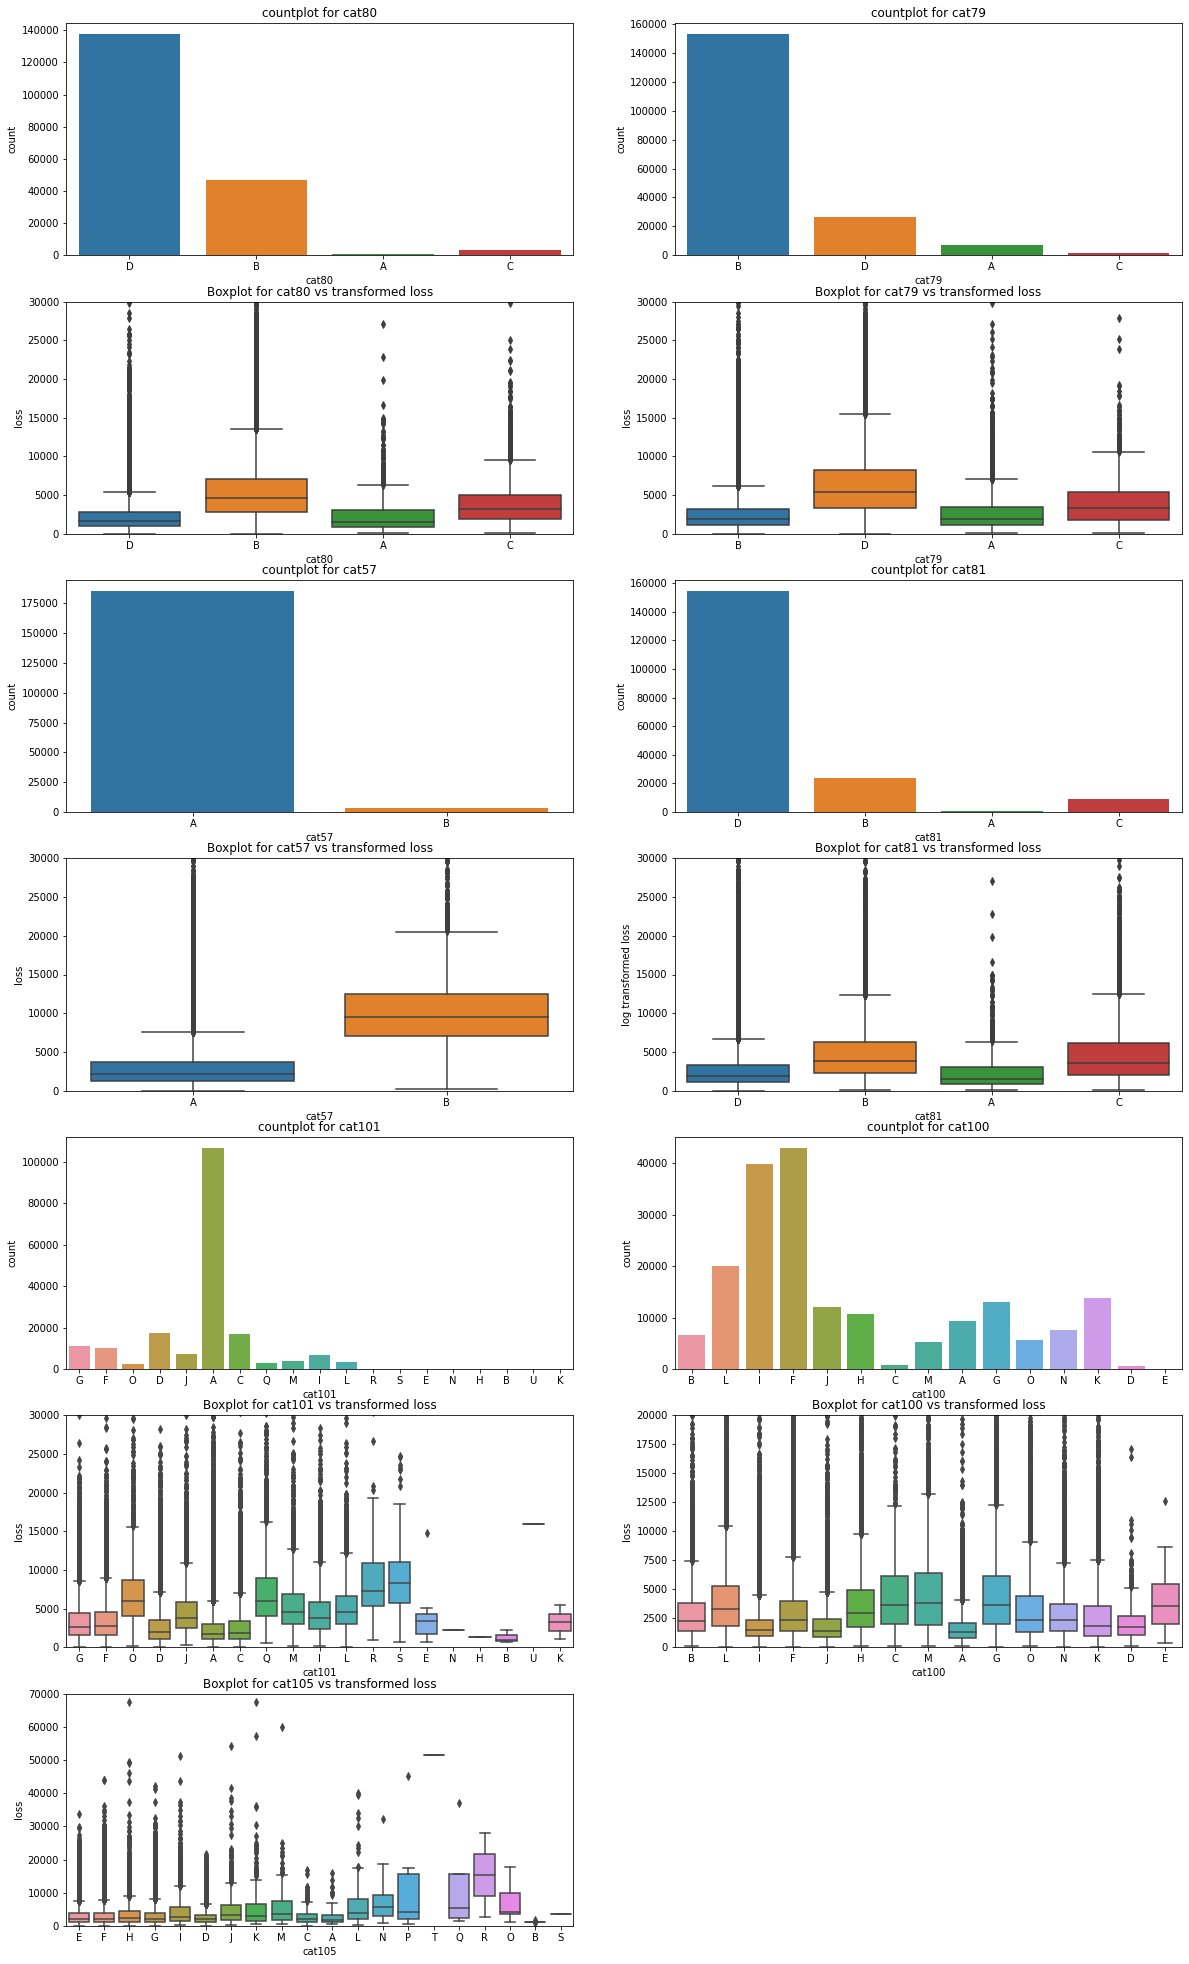

In [21]:
'''
Here we do some univariate analysis like count plot and bivariate analysis like boxplot of loss vs categorical features

Here we zoomed y-axis for boxplot so we can able to visualize properly. 
'''

fig = plt.figure(figsize = (20,35))

ax1 = fig.add_subplot(7,2,1) 
sns.countplot(data = data_train,x = 'cat80' )
plt.title('countplot for cat80')

ax2 = fig.add_subplot(7,2,2) 
sns.countplot(data = data_train,x = 'cat79' )
plt.title('countplot for cat79')

ax3 = fig.add_subplot(7,2,5) 
sns.countplot(data = data_train,x = 'cat57' )
plt.title('countplot for cat57')

ax4 = fig.add_subplot(7,2,6) 
sns.countplot(data = data_train,x = 'cat81' )
plt.title('countplot for cat81')

ax5 = fig.add_subplot(7,2,9) 
sns.countplot(data = data_train,x = 'cat101' )
plt.title('countplot for cat101')


ax6 = fig.add_subplot(7,2,10) 
sns.countplot(data = data_train,x = 'cat100' )
plt.title('countplot for cat100')



ax1 = fig.add_subplot(7,2,3) 
sns.boxplot(data = data_train,x = 'cat80',y = 'loss')
plt.ylabel('loss')
plt.ylim(0,30000)
plt.title('Boxplot for cat80 vs transformed loss')

ax2 = fig.add_subplot(7,2,4) 
sns.boxplot(data = data_train,x = 'cat79',y = 'loss')
plt.ylabel('loss')
plt.ylim(0,30000)
plt.title('Boxplot for cat79 vs transformed loss')

ax3 = fig.add_subplot(7,2,7) 
sns.boxplot(data = data_train,x = 'cat57',y = 'loss')
plt.ylabel('loss')
plt.ylim(0,30000)
plt.title('Boxplot for cat57 vs transformed loss')

ax4 = fig.add_subplot(7,2,8) 
sns.boxplot(data = data_train,x = 'cat81',y = 'loss')
plt.ylabel('log transformed loss')
plt.ylim(0,30000)
plt.title('Boxplot for cat81 vs transformed loss')

ax5 = fig.add_subplot(7,2,11) 
sns.boxplot(data = data_train,x = 'cat101',y = 'loss')
plt.ylabel('loss')
plt.ylim(0,30000)
plt.title('Boxplot for cat101 vs transformed loss')


ax6 = fig.add_subplot(7,2,12) 
sns.boxplot(data = data_train,x = 'cat100',y = 'loss')
plt.ylabel('loss')
plt.ylim(0,20000)
plt.title('Boxplot for cat100 vs transformed loss')


ax5 = fig.add_subplot(7,2,13) 
sns.boxplot(data = data_train,x = 'cat105',y = 'loss')
plt.ylabel('loss')
plt.ylim(0,70000)
plt.title('Boxplot for cat105 vs transformed loss')


Obsevations:

1. From count plot we can see that levels are not equaly/evenly frequent(unevenly distributed).Some of levels are highly frequent and some are very rare in categorical features.

2. There some levels in category are very very rare like some of them occur only once.

3. From box plot we can notice one thing that sometimes less frequent levels are have high variabilty(variance).This means less frequent levels in category are well spread over loss they give more information of target variable loss.

4. This high variance in rare levels is beacaus they have occure few times thus they have less samplple and they are well spread over loss.May me that's the reason they have high IQR range.

5. If we observed cat101 feature boxplot,level 'U' is occur only single time and it's mean/median/loss around 15000 so we might say it's an outlier.

6. Simmilarly in cat105 feature boxplot, level 'T' is occure only once and it's mean/median/loss around 50000 and so we can consider this as a outlier point.

7. So we can say some of the rare frequent levels can be considered as outliers. So we have to do encoding according to this.


8. So in conclusion we can say very frequently occured level has almost same median/mean value in boxplot.And levels are moderatly frquent have high variance .And last some of very rare occured levels can be likely to be considered as outliers.



### **EDA on important continuous features:**

**A. Univariate Analysis:**

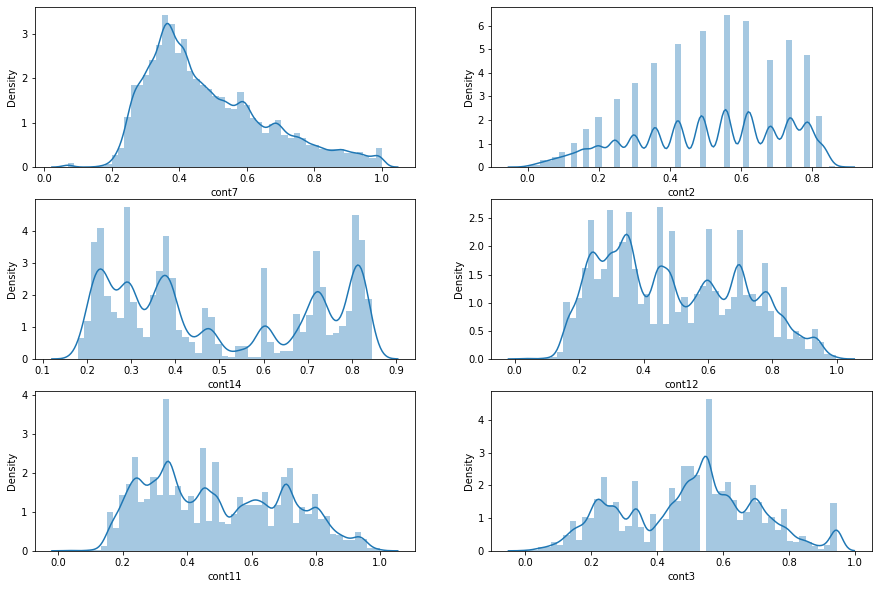

In [22]:
cont_imp_feature = ['cont7','cont2','cont14','cont12','cont11','cont3']
fig= plt.subplots(figsize=(15,10))

for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1) 
  sns.distplot(data_train[j])

From univariate analysis we can say continuous features are randomly distributed.

Now we do some transformation on continuous features.

**1. log transformation:**

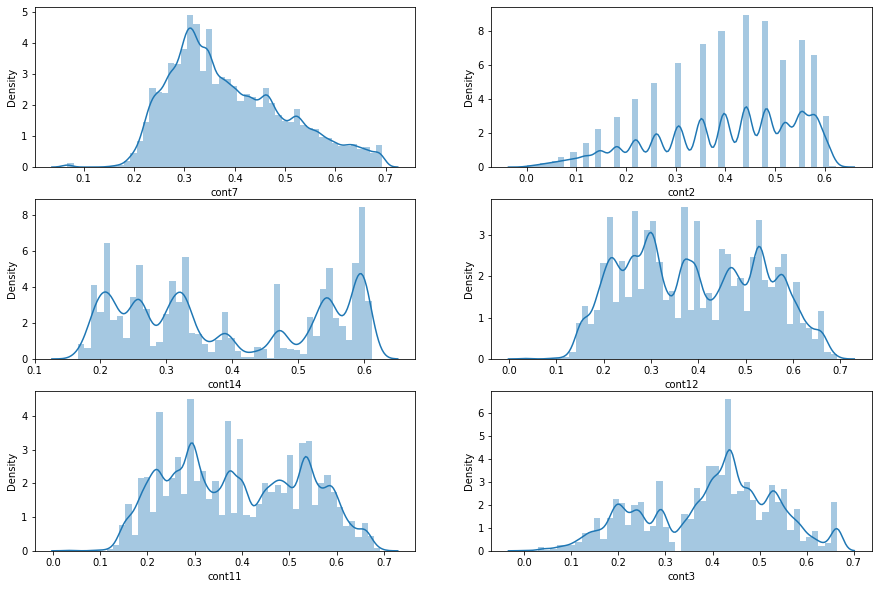

In [23]:
fig= plt.subplots(figsize=(15,10))
for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  transf = np.log(data_train[j]+1)
  sns.distplot(transf)

**2. Box-cox transform:**

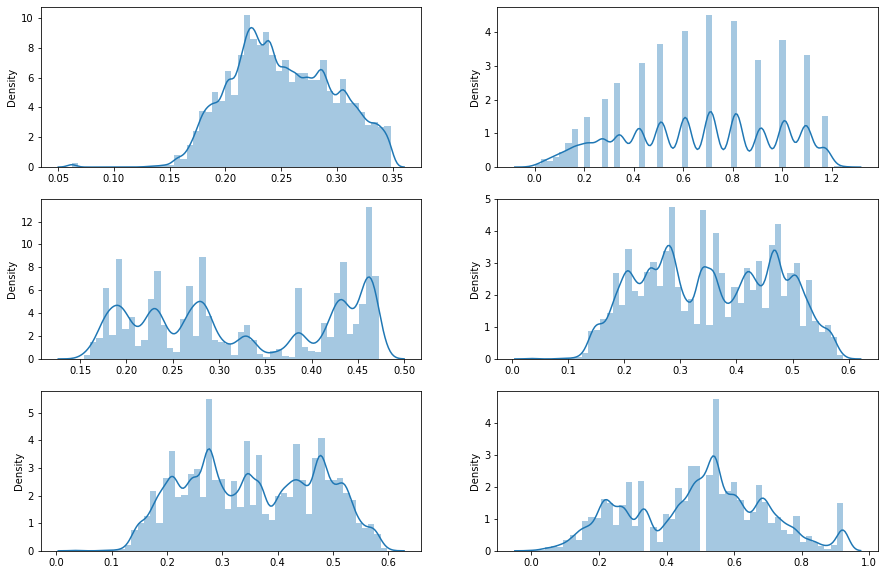

In [24]:

fig= plt.subplots(figsize=(15,10))
for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  fit_data, fit_lambda = stats.boxcox(data_train[j]+1)
  sns.distplot(fit_data)


**3. Squre root transformation :**

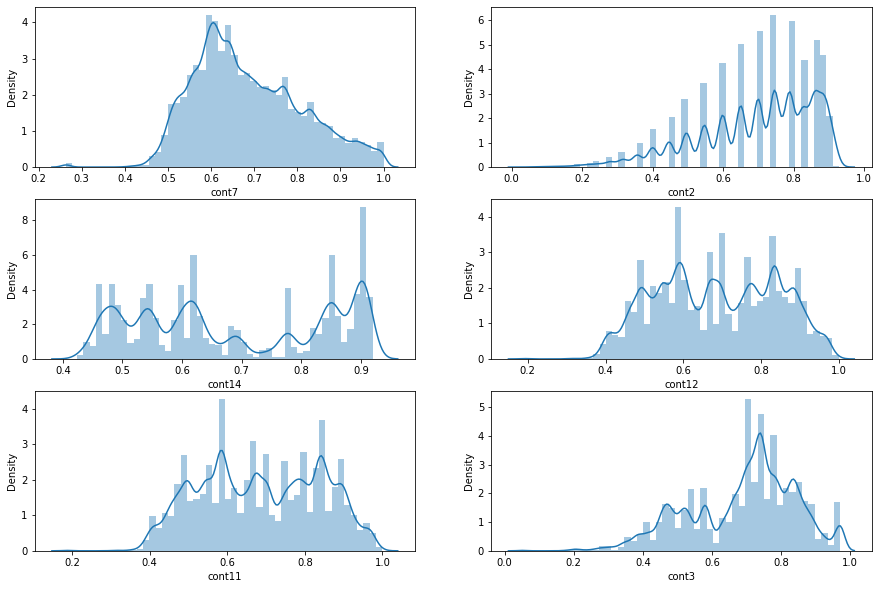

In [28]:
fig= plt.subplots(figsize=(15,10))
for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  transf = np.sqrt(data_train[j])
  sns.distplot(transf)

**4. Square transformation :**

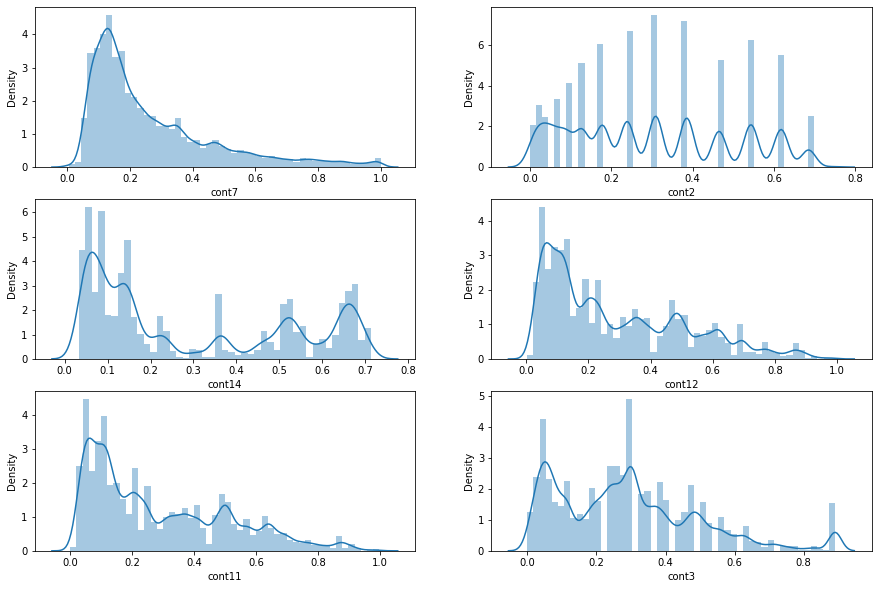

In [29]:
fig= plt.subplots(figsize=(15,10))
for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  transf = np.power(data_train[j],2)
  sns.distplot(transf)

**5. Exponential transformation**

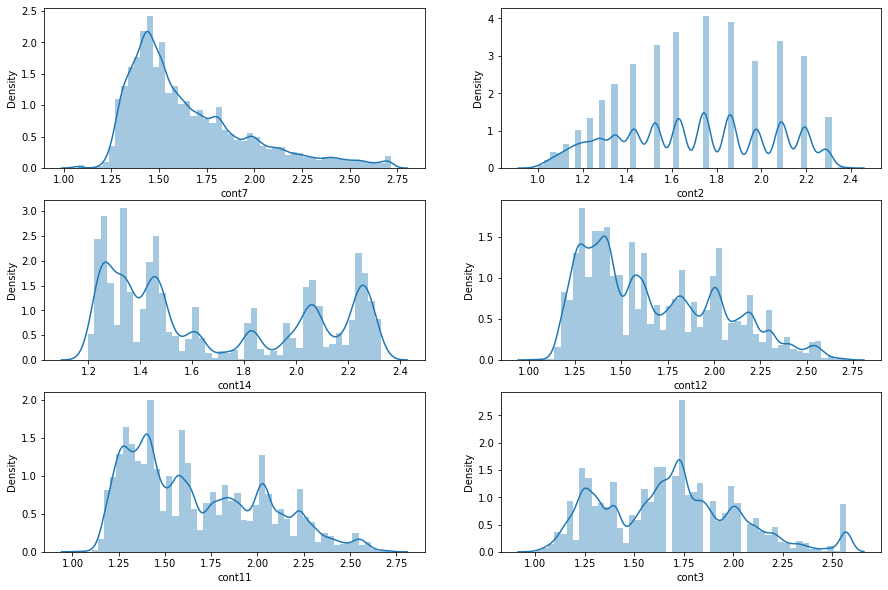

In [31]:
fig= plt.subplots(figsize=(15,10))
for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  transf = np.exp(data_train[j])
  sns.distplot(transf)

We apply multiple transformation on these continuous features.But distribution is almost same only scale chages here there.And we see cont11 and cont12 features distribution are almost same.so we can say they both come from same distribution so we will drop one of them.

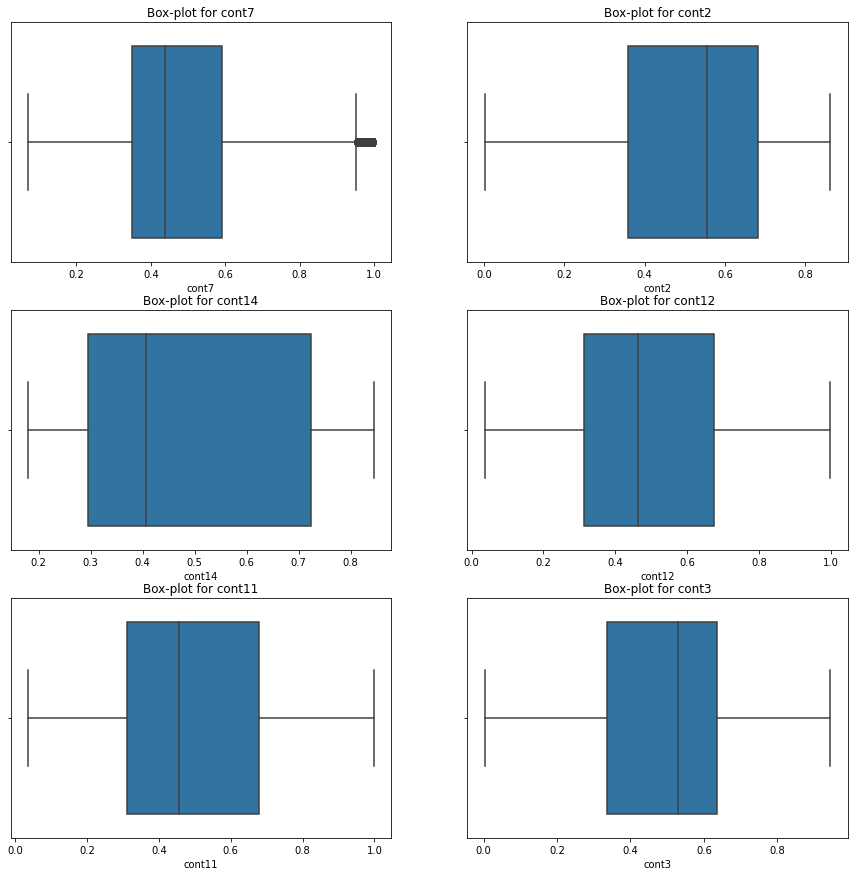

In [35]:


fig= plt.subplots(figsize=(15,15))
for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  sns.boxplot(x = data_train[j])
  plt.title('Box-plot for {}'.format(j))


From Box-plot we can see some features like cont7 has outliers and cont14 features has high variance

**B. Bivariate Analysis :**

**Scatter plot**

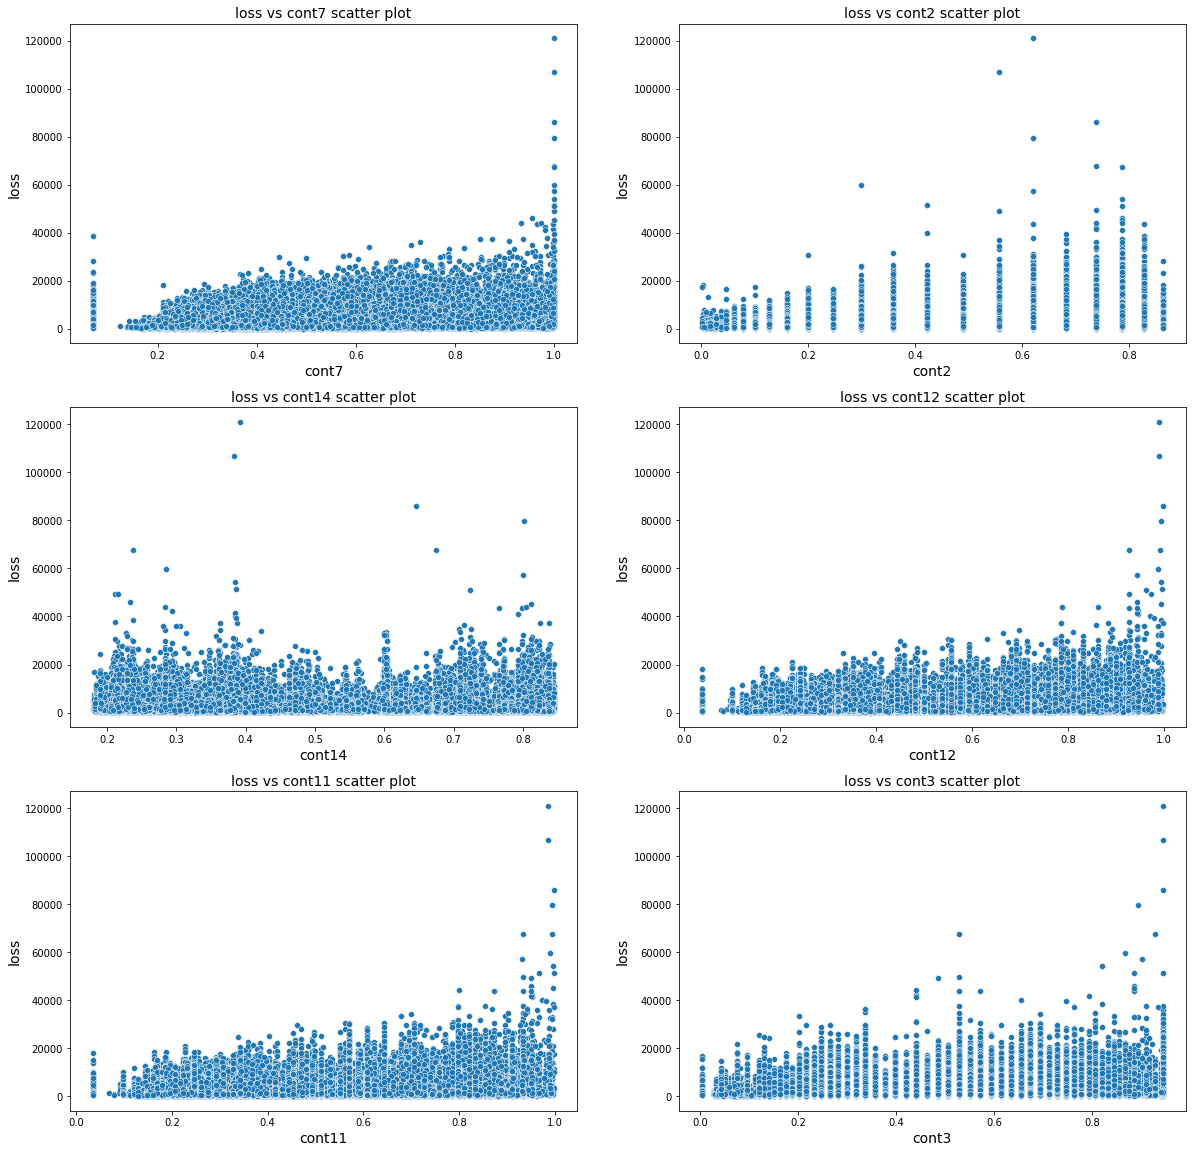

In [26]:
fig= plt.subplots(figsize=(20,20))

for i,j in enumerate(cont_imp_feature):
  plt.subplot(3,2,i+1)
  sns.scatterplot(y = data_train['loss'],x =data_train[j])
  plt.ylabel('loss',fontsize=14)
  plt.xlabel(j,fontsize=14)
  plt.title('loss vs {} scatter plot'.format(j),fontsize=14)

Scattet plot also show data is scaled in range of 0 to 1.

We have some outliers in each of these features.

Since we have only 16 continious features so we will do some analysis on all of them.

**Continious Features Analysis:**

In [32]:
data_train.describe()

id          cont1  ...         cont14           loss
count  188318.000000  188318.000000  ...  188318.000000  188318.000000
mean   294135.982561       0.493861  ...       0.495717    3037.337686
std    169336.084867       0.187640  ...       0.222488    2904.086186
min         1.000000       0.000016  ...       0.179722       0.670000
25%    147748.250000       0.346090  ...       0.294610    1204.460000
50%    294539.500000       0.475784  ...       0.407403    2115.570000
75%    440680.500000       0.623912  ...       0.724623    3864.045000
max    587633.000000       0.984975  ...       0.844848  121012.250000

[8 rows x 16 columns]

Here we can see Mean of continious features are around 0.5 and standerd deviation around 0.2 except 'loss' variable.

All Continuous features are ranging from 0 to 1 no negative values.

Target variable also has non negative values and mean 3037. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c5aa0128>,
      dtype=object)

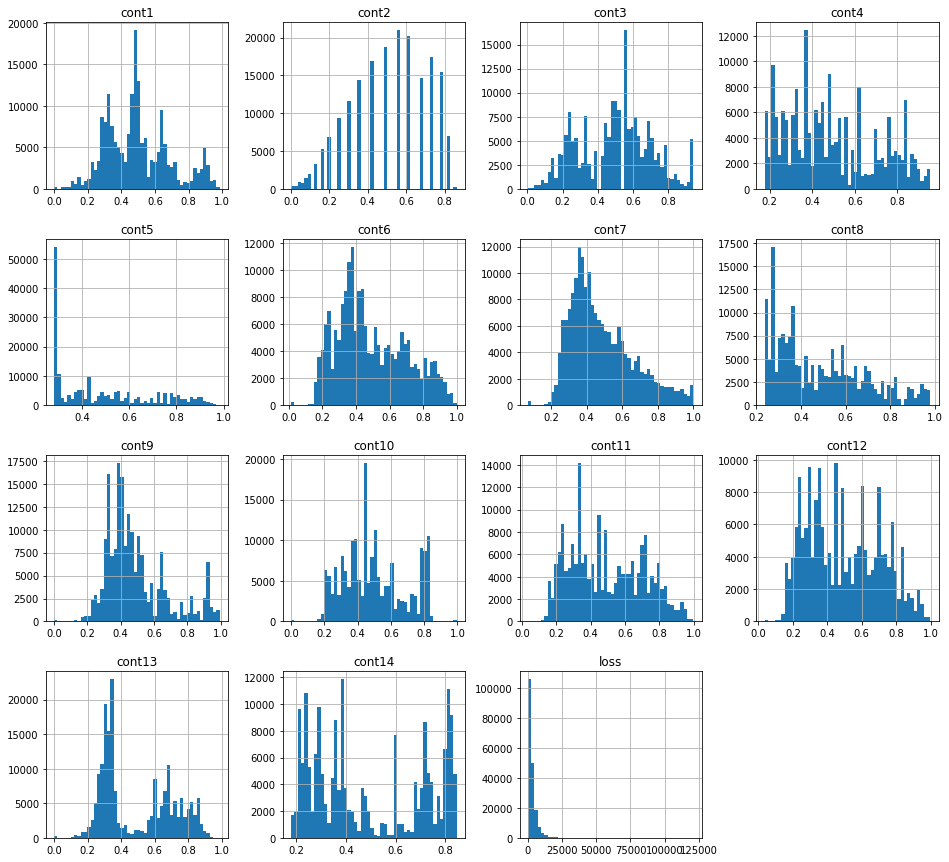

In [33]:
'''
Histogram plot for each continious feature
'''
data_train[continous_features_train].hist(bins=50, figsize=(16,15))

Here we see distribution of all continuous variables. We observe that there are no uniformity in PDF's i.e. lot's of spike in each plot.

### Boxplot

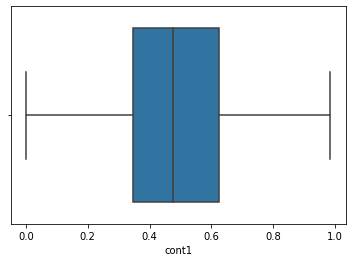

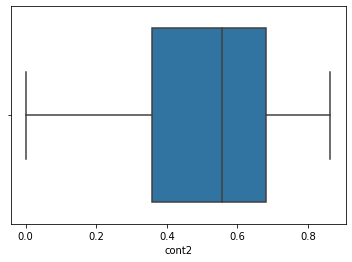

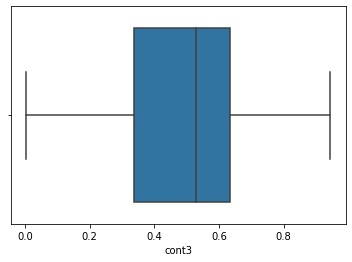

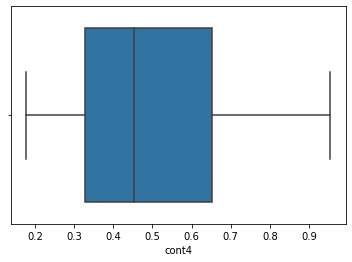

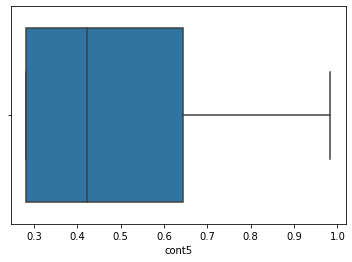

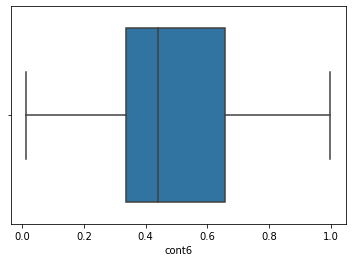

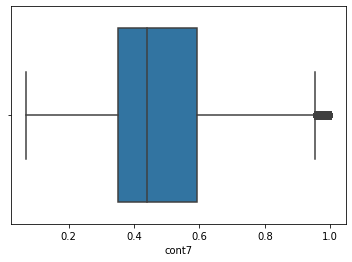

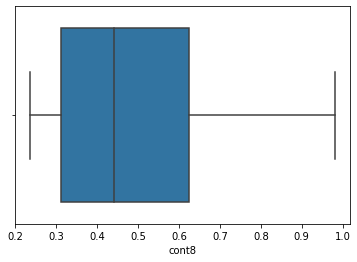

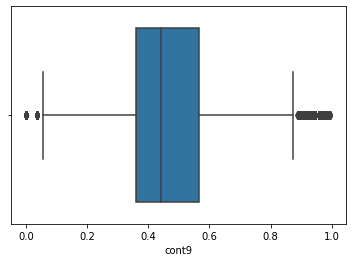

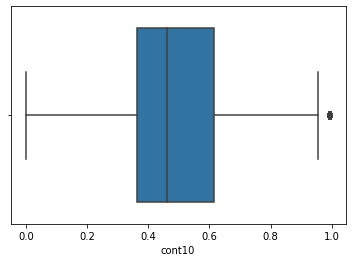

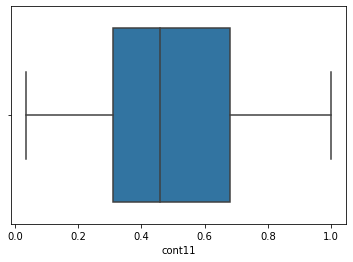

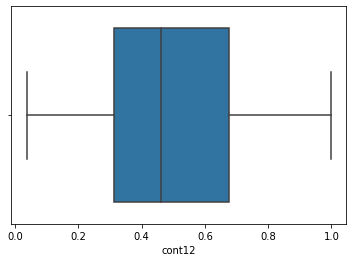

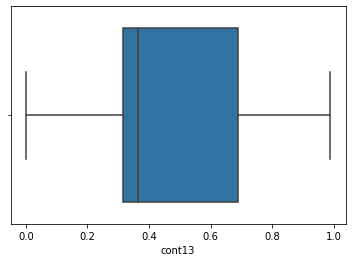

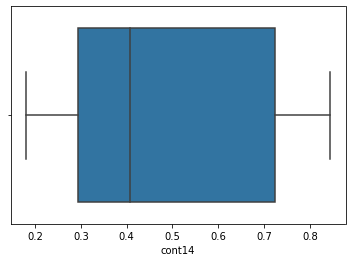

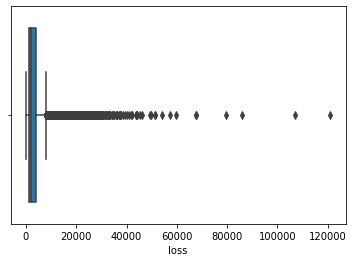

In [34]:
for i in continous_features_train:
  sns.boxplot(x = data_train[i])
  plt.show()


> We can see here as well means of all contionious variables are 0.5 except 'loss'. Median (50 percentile) is around 0.5 as well.


> In some features like cont7,cont9,cont10 we see some point are above upper whiskar and some points are in below lower whisker.We can say that might be an outlieres.








### Violin Plot

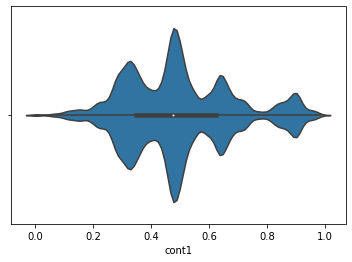

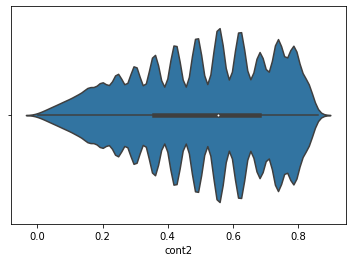

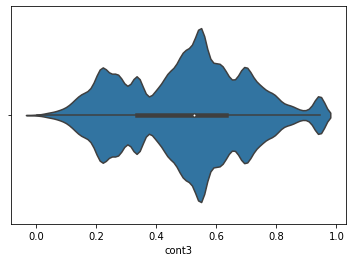

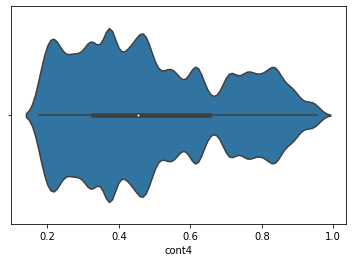

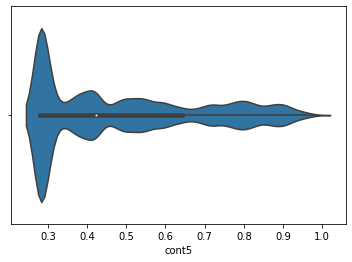

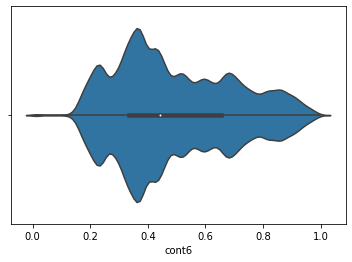

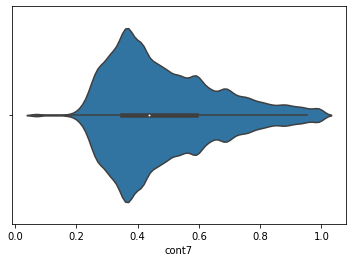

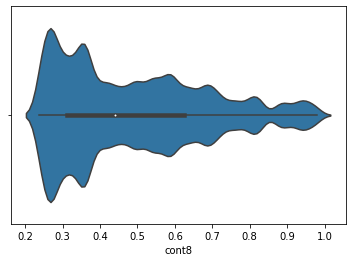

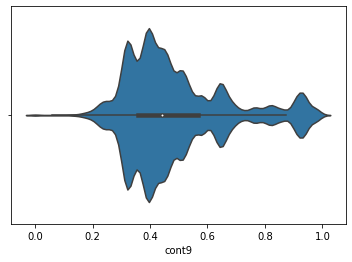

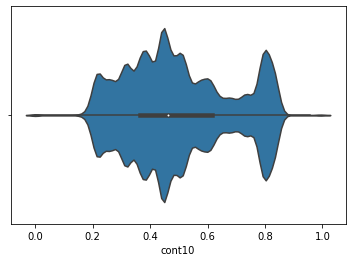

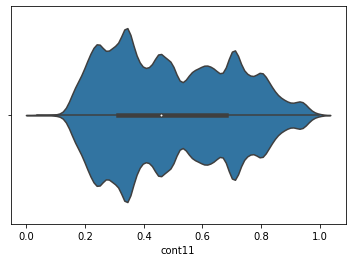

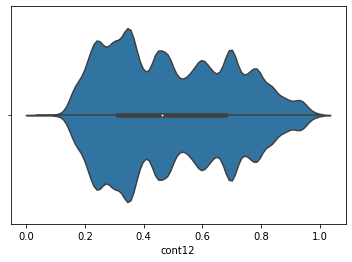

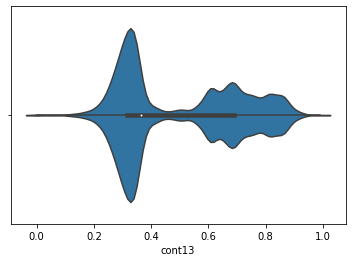

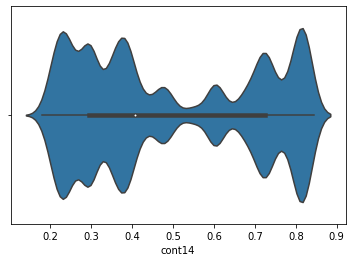

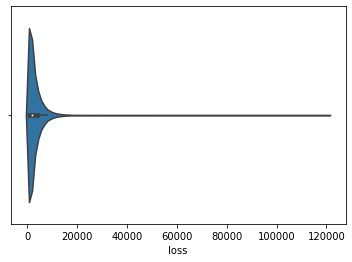

In [35]:
'''
Violin plot

'''
for i in continous_features_train:
  sns.violinplot(x=data_train[i])
  plt.show()

Violin plot also give same intution as boxplot but this plot give idea of distributon as well

### **Correlation between features and target variable**

Text(0.5, 1.0, 'Correlation heatmap')

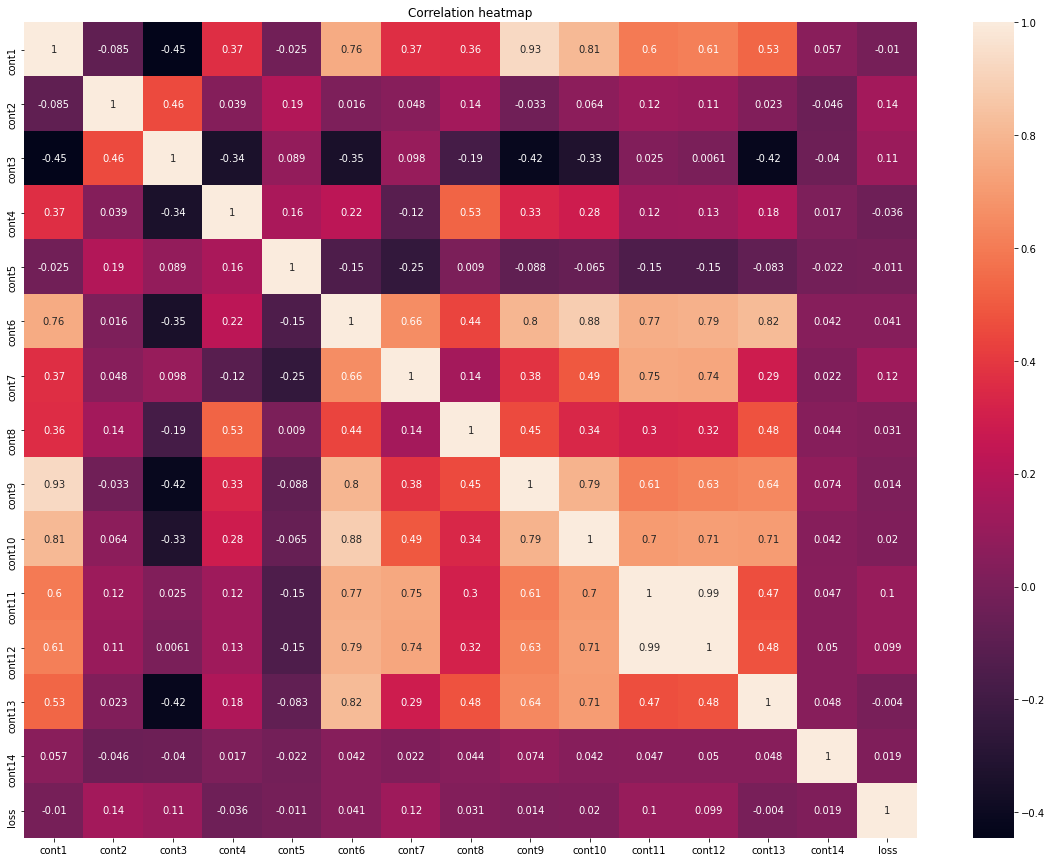

In [36]:
'''
Correlation matrix for see correlations between continuous feautres.
It's ranging between -1 to 1. and higher the value more the correlated they are.
'''

plt.figure(figsize = (20,15))
correlation = data_train[continous_features_train].corr()
sns.heatmap(correlation,annot=True)
plt.title('Correlation heatmap')


In [37]:
corr_list = []
th = 0.8
for i in range(0,len(continous_features_train)):
  for j in range(i+1,len(continous_features_train)):
    if((correlation.iloc[i,j]>=th and correlation.iloc[i,j]<1) or (correlation.iloc[i,j]>=-1 and correlation.iloc[i,j]<=-th)):
      corr_list.append([correlation.iloc[i,j],i,j])
corr_list.sort(key=lambda x:-x[0])

for i,j,k in corr_list:
  print('Correlation between {} and {} is :  {}'.format(continous_features_train[j],continous_features_train[k],i))

Correlation between cont11 and cont12 is :  0.9943841100215426
Correlation between cont1 and cont9 is :  0.9299117057616605
Correlation between cont6 and cont10 is :  0.8833505068490387
Correlation between cont6 and cont13 is :  0.8150910765208513
Correlation between cont1 and cont10 is :  0.808550869433365


We can see some of continuous features are strongly correlated.So we can remove one of them feature. Like cont11 and cont12 are highly correlated.so we can remove one of them.

**Pair plot for highly correlated features:**

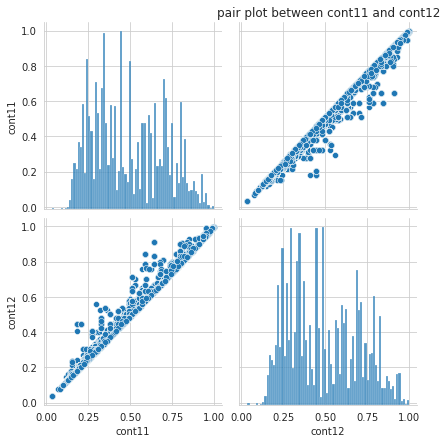

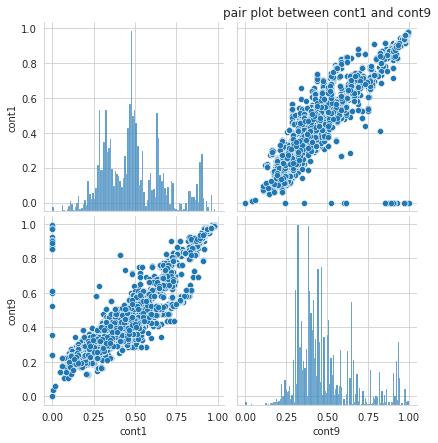

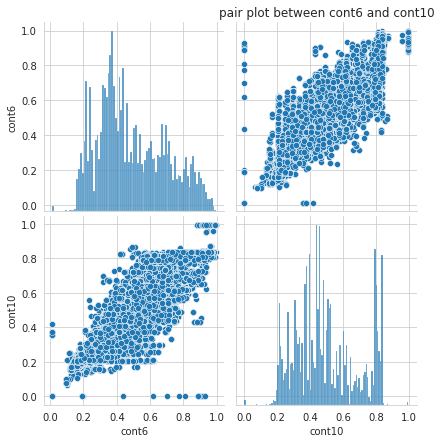

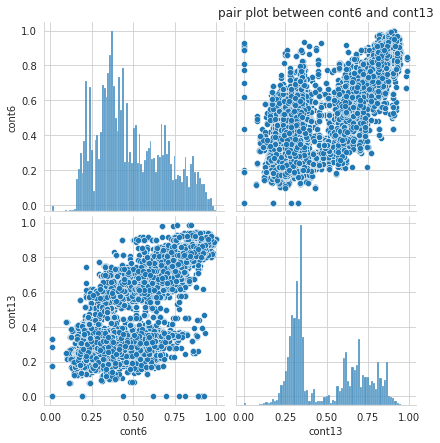

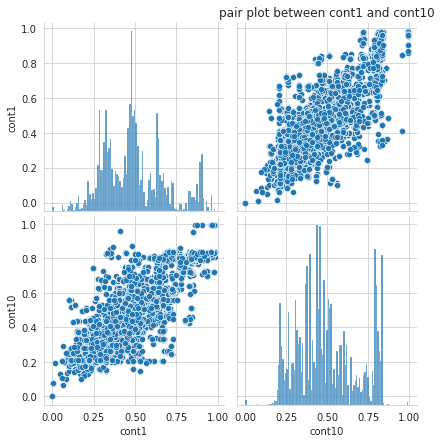

In [38]:
'''
Pair plot between highly correlated features
'''
for i,j,k in corr_list:
  sns.set_style("whitegrid")
  sns.pairplot(data_train, vars=[continous_features_train[j],continous_features_train[k]], height=3)
  plt.title('pair plot between {} and {}'.format(continous_features_train[j],continous_features_train[k]))
  plt.show()

Upto here we do analysis on categorical features and continuous features. Now we will do some analysis of target variable 'Loss'

## **'Loss' variable Analysis**

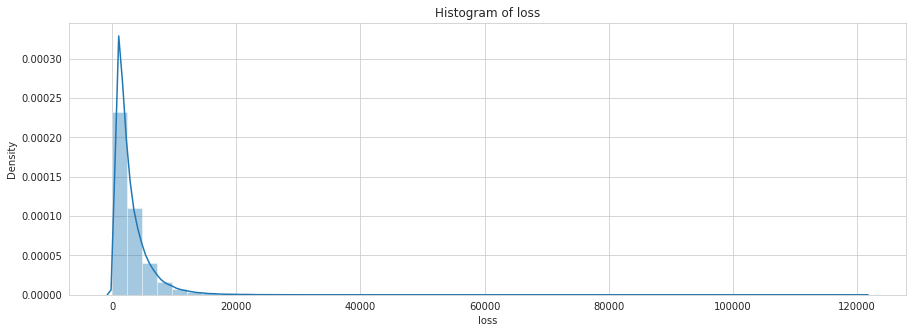

In [39]:
plt.figure(figsize = (15,5))
sns.distplot(data_train['loss'])
plt.title('Histogram of loss')
plt.show()


> 'Loss' plot looks like it follows power law distribution.And very much right sided skewed plot.

> We can do log-transform and box-cox transform on it so we might get gaussion like distribution.





### **1. Box-Cox Transformation**

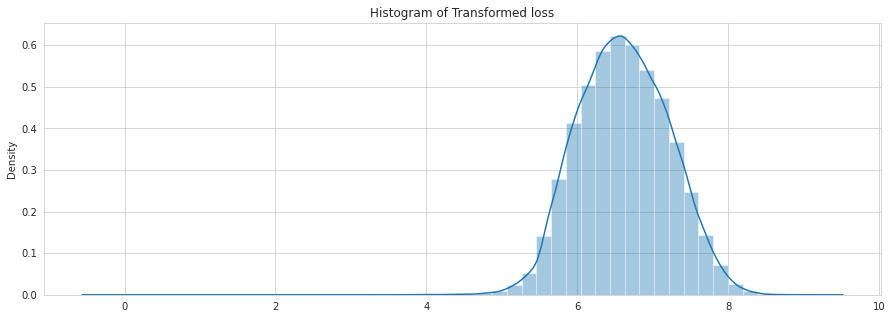

mean :  6.61588011914551
std :  0.5983087682958163


In [40]:
''' 
Box-Cox transform on "Loss" variable
'''

fitted_data, fitted_lambda = stats.boxcox(data_train['loss']) 

plt.figure(figsize = (15,5))
sns.distplot(fitted_data)
plt.title('Histogram of Transformed loss')
plt.show()

print('mean : ',fitted_data.mean())
print('std : ', fitted_data.std())

### **2. Log transformation :** 

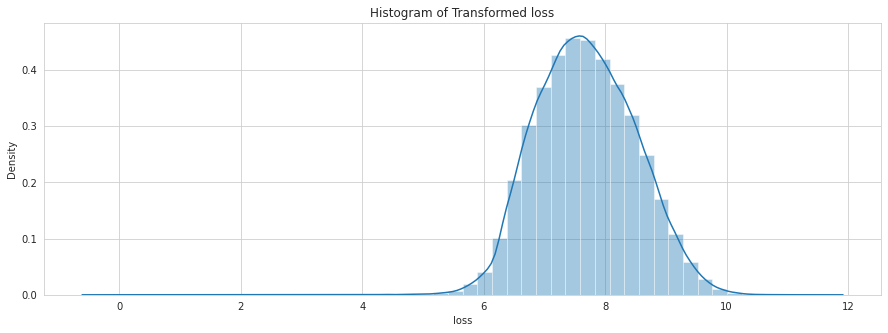

mean :  7.6852678428493535
std :  0.8118680942954611


In [42]:
plt.figure(figsize = (15,5))
sns.distplot(np.log(data_train['loss']))
plt.title('Histogram of Transformed loss')
plt.show()
log_loss = np.log(data_train['loss'])

print('mean : ',log_loss.mean())
print('std : ',log_loss.std())



> We transformed power-law like distribution to gaussian distribution using Box-Cox transformation.

> we get gaussian like distribution with mean = 6.61,std = 0.59 with box-cox and mean= 7.68,std = 0.811



> Both transformation are look like almost same.



> So, we want to sure that this transformed distribution is gaussian or not for that we do following technique:

1.   Q-Q plot










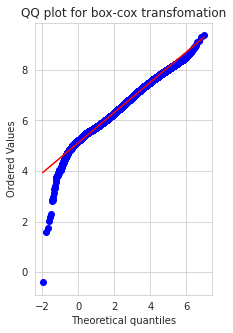

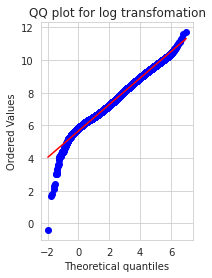

In [48]:
'''
Q-Q plot
'''
import pylab

fig= plt.subplots(figsize=(7,5))

plt.subplot(1,2,1)
stats.probplot(fitted_data, dist = stats.norm,sparams=(2.5,), plot=pylab)
plt.title('QQ plot for box-cox transfomation')
plt.show()


plt.subplot(1,2,2)
stats.probplot(log_loss, dist = stats.norm,sparams=(2.5,), plot=pylab)
plt.title('QQ plot for log transfomation')
plt.show()

We can see from QQ plot that our transformed distribution largly follow normal distribution.

**Shift + log_transform**

mean :  7.799837008871419
std :  0.7315532087292843


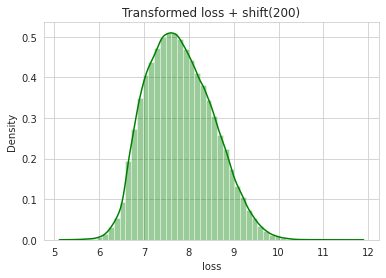

In [42]:
'''
We shift some point by some number like 200.
'''
lo =np.log(data_train['loss']+200)
sns.distplot(np.log(data_train['loss']+200), bins=50, color='g')
plt.title('Transformed loss + shift(200)')

print('mean : ',lo.mean())
print('std : ',lo.std())

Here we shift transformed distribution by 200. we can change this number.But question is how to choose that number.
Simple way is plot QQ plot for bunch of numbers and observe plot and decide which number to choose.

Now we will see how adding shift will change the distribution with help of QQ plot.

shift :  0


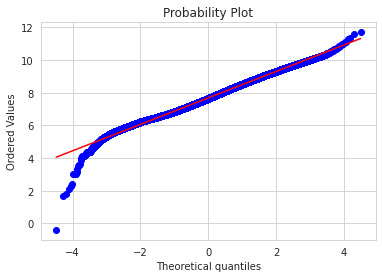

shift :  25


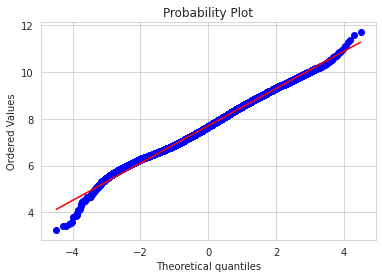

shift :  50


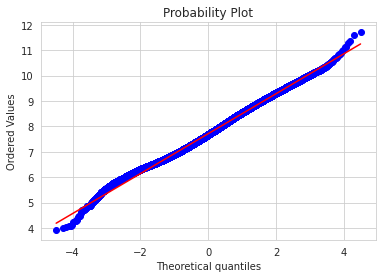

shift :  75


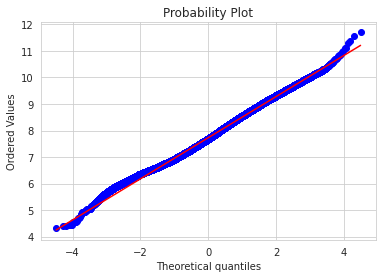

shift :  100


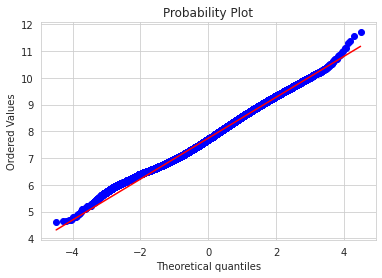

shift :  125


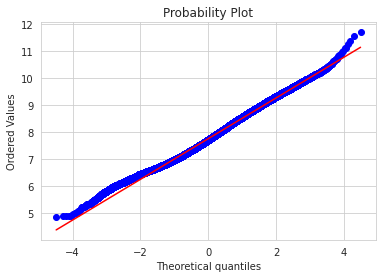

shift :  150


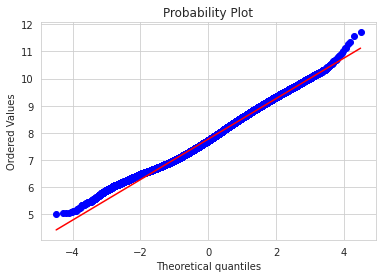

shift :  175


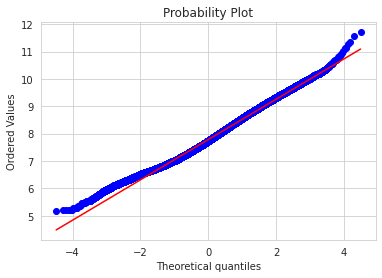

shift :  200


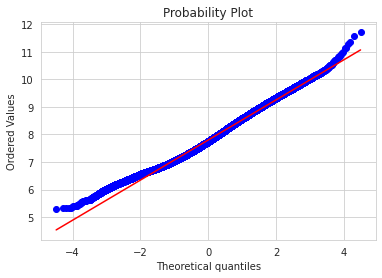

shift :  225


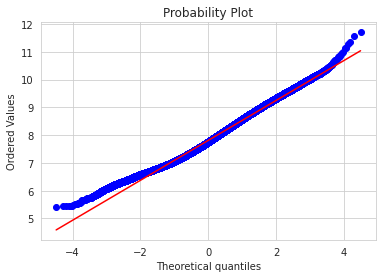

shift :  250


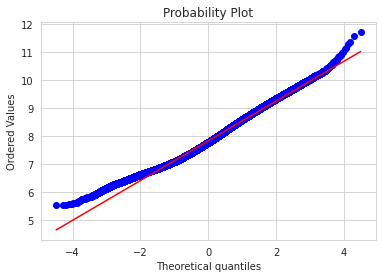

shift :  350


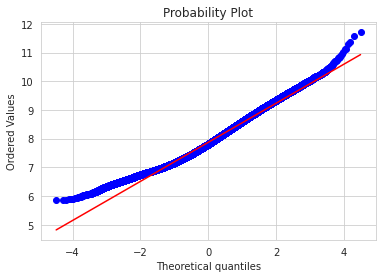

In [43]:
'''
QQ plots using some SHIFTS
'''

a = [0,25,50,75,100,125,150,175,200,225,250,350]  #shifts
for i in a:
  print('shift : ',i)
  lo =np.log(data_train['loss']+i)
  stats.probplot(lo, dist = stats.norm, plot=pylab)
  pylab.show()

From above observation we can say adding shift will change distribution slightly.

From above graphs we can say that we can choose shift =100 or 75 because this more points are on straight line.

So here we choosing '75'

mean :  7.7308194499385525
std :  0.7778717250273025


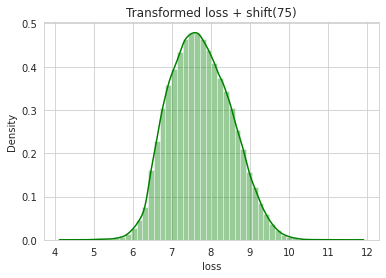

In [44]:
# we will choose shift =75 and do log transformation

lo =np.log(data_train['loss']+75)
sns.distplot(lo, color='g')
plt.title('Transformed loss + shift(75)')
print('mean : ',lo.mean())
print('std : ',lo.std())

How distribution changes from skewed to normal:

Univariate Analysis:

Text(0.5, 1.0, 'Transformed Loss + shift')

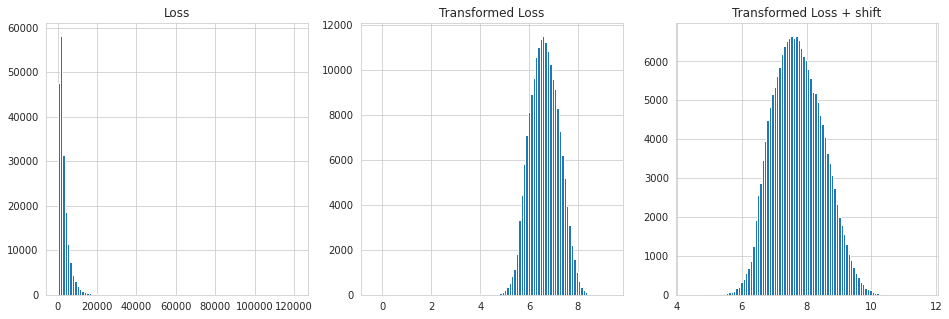

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(16,5)

ax1.hist(data_train['loss'],bins =100)
ax1.set_title('Loss')

ax2.hist(fitted_data,bins =100)
ax2.set_title('Transformed Loss')

ax3.hist(lo,bins =100)
ax3.set_title('Transformed Loss + shift')

Bivariate Analysis:

Text(0.5, 1.0, 'Transformed loss Box-Plot')

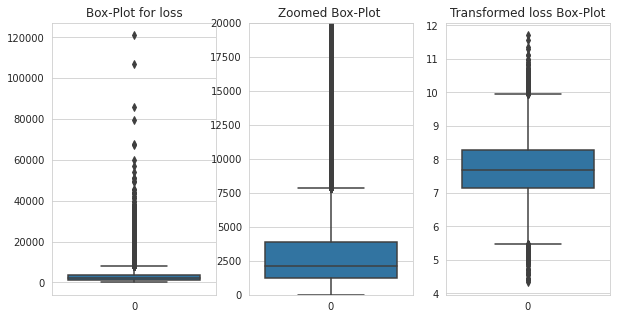

In [46]:
fig= plt.subplots(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(data = data_train['loss'])
plt.title('Box-Plot for loss')

plt.subplot(1,3,2)
plt.ylim(0,20000)
sns.boxplot(data = data_train['loss'])
plt.title('Zoomed Box-Plot ')

plt.subplot(1,3,3)
sns.boxplot(data = lo)    
plt.title('Transformed loss Box-Plot')

Here we can see outliers above and below whisker.
1. So here we have to careful with outliers.Model should not be overfitted with these outliers.


**Scatter plot with 'loss'**

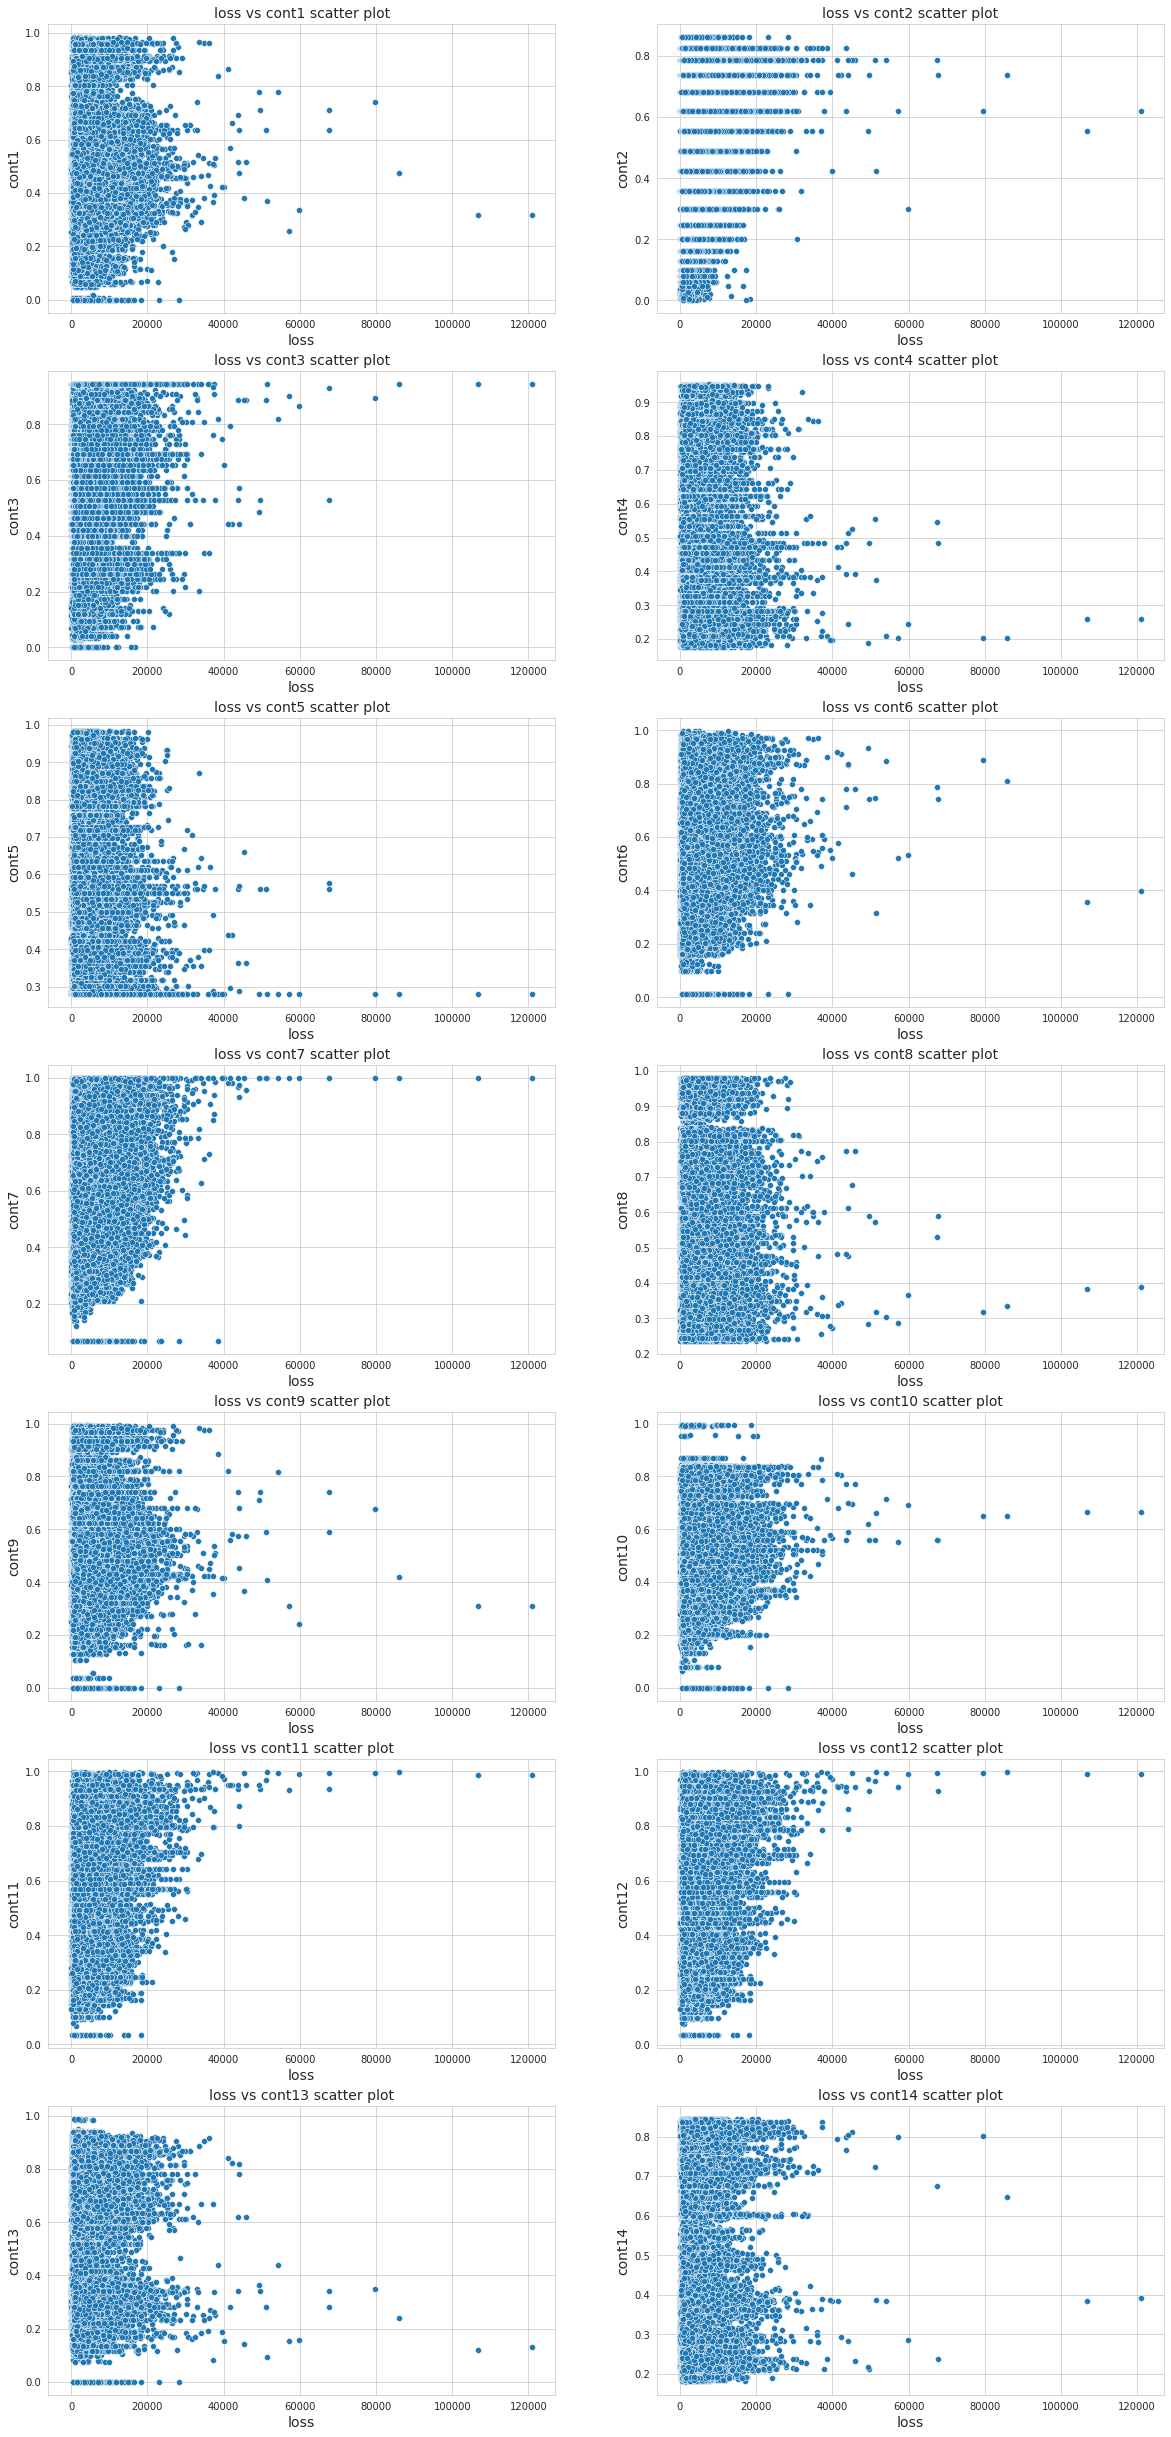

In [47]:
fig= plt.subplots(figsize=(20,50))

for i,j in enumerate(continous_features_train[:-1]):
  plt.subplot(8,2,i+1)
  sns.scatterplot(x = data_train['loss'],y =data_train[j])
  plt.ylabel(j,fontsize=14)
  plt.xlabel('loss',fontsize=14)
  plt.title('loss vs {} scatter plot'.format(j),fontsize=14)



1. Here we see in scatter plot we have some point which are far away.We can think these points as Outlier.In every feature there are few points are far away.

2. So we visually see some outliers using boxplot and scatter plot.

Let's what happen when we use transformed 'loss' variable.

**Scatter plot for 'transformed loss'**

In [48]:
'''
Scatter plot using transformed 'loss' variable
'''
fig= plt.subplots(figsize=(20,50))

for i,j in enumerate(continous_features_train[:-1]):
  plt.subplot(8,2,i+1)
  sns.scatterplot(x = lo,y =data_train[j])
  plt.ylabel(j,fontsize=14)
  plt.xlabel('loss',fontsize=14)
  plt.title('loss vs {} scatter plot'.format(j),fontsize=14)


Output hidden; open in https://colab.research.google.com to view.

With transformed 'loss' we not seen points that are very far away .They are almost closely grouped.So we will use transformed dependent variable for modeling.

**Univariate and Bivariate analysis of  Categorical features with 'transformed loss'**

Text(0.5, 1.0, 'Boxplot for cat107 vs transformed loss')

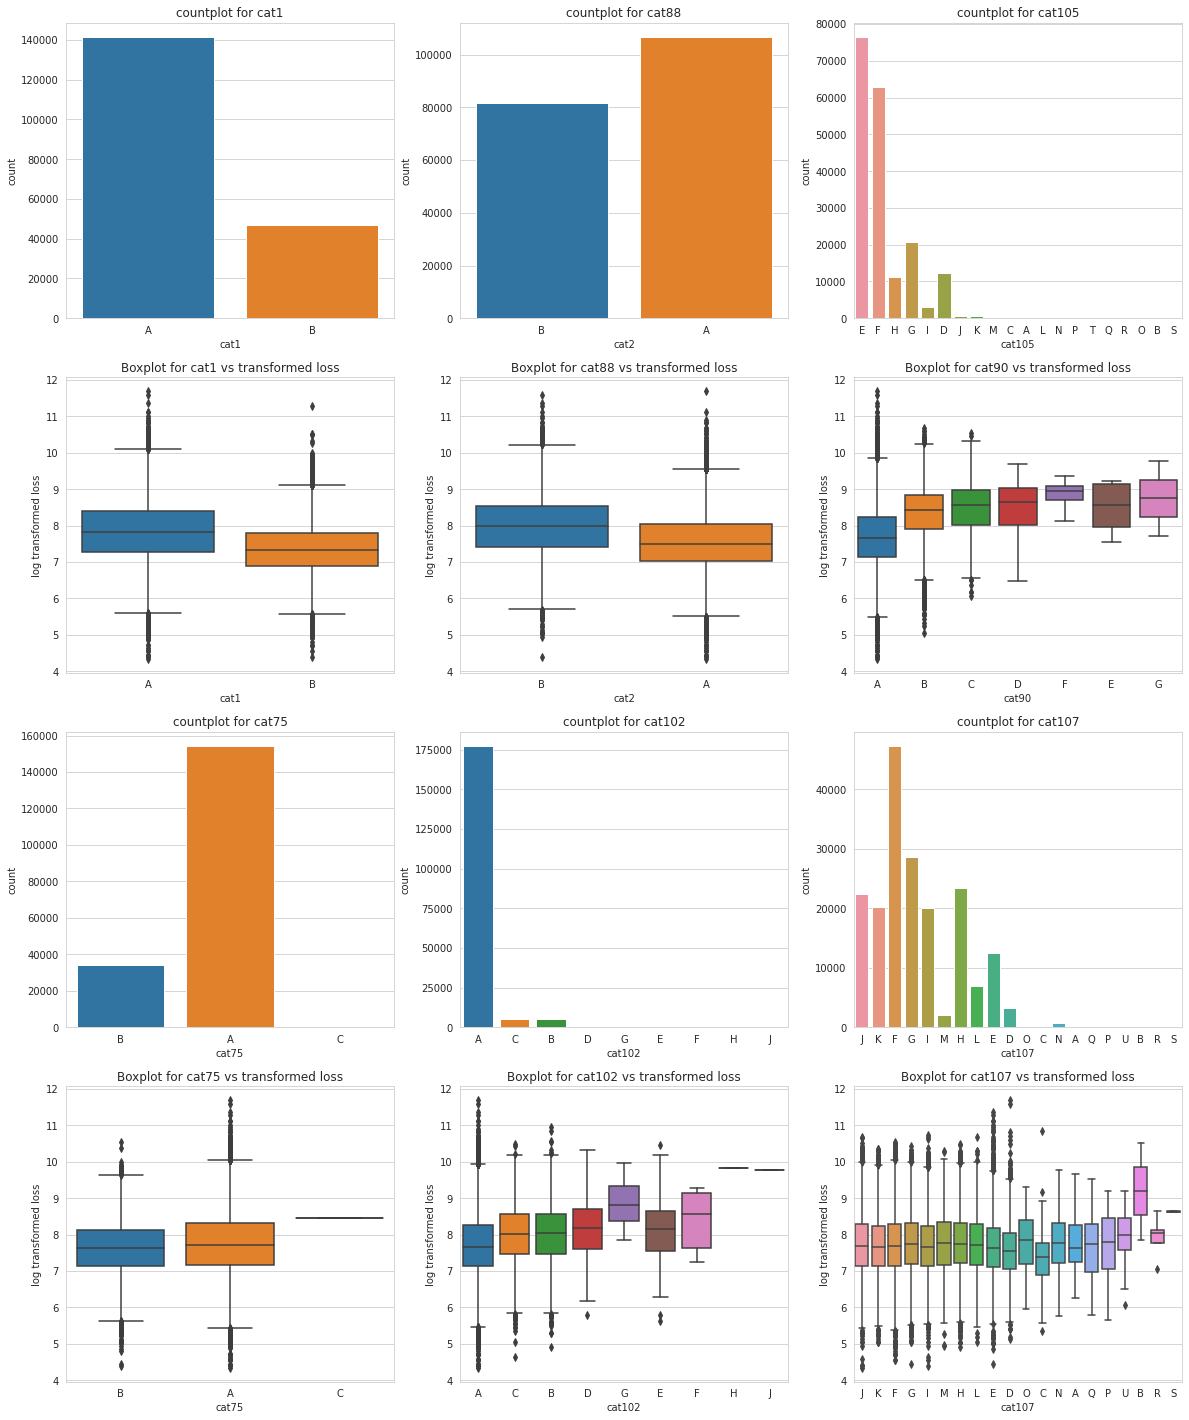

In [49]:
fig = plt.figure(figsize = (20,25))

ax1 = fig.add_subplot(4,3,1) 
sns.countplot(data = data_train,x = 'cat1' )
plt.title('countplot for cat1')

ax2 = fig.add_subplot(4,3,2) 
sns.countplot(data = data_train,x = 'cat2' )
plt.title('countplot for cat88')

ax3 = fig.add_subplot(4,3,3) 
sns.countplot(data = data_train,x = 'cat105' )
plt.title('countplot for cat105')

ax4 = fig.add_subplot(4,3,4) 
sns.boxplot(data = data_train,x = 'cat1',y = lo)
plt.ylabel('log transformed loss')
plt.title('Boxplot for cat1 vs transformed loss')

ax5 = fig.add_subplot(4,3,5) 
sns.boxplot(data = data_train,x = 'cat2',y = lo)
plt.ylabel('log transformed loss')
plt.title('Boxplot for cat88 vs transformed loss')

ax6 = fig.add_subplot(4,3,6) 
sns.boxplot(data = data_train,x = 'cat90',y = lo)
plt.ylabel('log transformed loss')
plt.title('Boxplot for cat90 vs transformed loss')



ax7 = fig.add_subplot(4,3,7) 
sns.countplot(data = data_train,x = 'cat75' )
plt.title('countplot for cat75')

ax8 = fig.add_subplot(4,3,8) 
sns.countplot(data = data_train,x = 'cat102' )
plt.title('countplot for cat102')

ax9 = fig.add_subplot(4,3,9) 
sns.countplot(data = data_train,x = 'cat107' )
plt.title('countplot for cat107')


ax4 = fig.add_subplot(4,3,10) 
sns.boxplot(data = data_train,x = 'cat75',y = lo)
plt.ylabel('log transformed loss')
plt.title('Boxplot for cat75 vs transformed loss')

ax5 = fig.add_subplot(4,3,11) 
sns.boxplot(data = data_train,x = 'cat102',y = lo)
plt.ylabel('log transformed loss')
plt.title('Boxplot for cat102 vs transformed loss')

ax6 = fig.add_subplot(4,3,12) 
sns.boxplot(data = data_train,x = 'cat107',y = lo)
plt.ylabel('log transformed loss')
plt.title('Boxplot for cat107 vs transformed loss')




We seen previously loss vs some important categorical feature box plot.Now we do same thing with transformed loss variable.Here also we can say 50th percentile of categorical levels in categorical features are almost same.we can't differentiate easily there are some levels in feature are have different median value which shows some levels are use to predict loss. 

## **Checking whether data coming from same distribution**

Here we will check given train and test set are follows same distribution or not.

This can be done using simple technique as folows:

1. labelled train set as class '1' and test set as class '0'
2. Run classification model on train data(X_train,y_train).
3. Predict classes for test data(X_test).
4. Calculate Accuracy(y_predict,y_test).
5. if we got low accuracy means model not able to classify labels i.e. train and test follows same distribution .And if high accuracy means model able to classify classes easily i.e we can say they follows different distribution.

1. Preparing Data:

In [ ]:
train_data_dropped = data_train.drop(['id','loss'], axis=1)
test_data_dropped  = data_test.drop(['id'], axis=1)

print('Shape of Train data :',train_data_dropped.shape)
print('Shape of Test  data :',test_data_dropped.shape)

Shape of Train data : (188318, 130)
Shape of Test  data : (125546, 130)


2. Assign classes and merge train and test set.

In [ ]:
#Now we create a label for test and train data as 0 , 1 respectively.
train_data_dropped['target'] = 1
test_data_dropped['target'] = 0
final_df = pd.concat((train_data_dropped,test_data_dropped))

In [ ]:
data_label_encode = final_df.copy()
final_df.head()

cat1 cat2 cat3 cat4 cat5  ...    cont11    cont12    cont13    cont14 target
0    A    B    A    B    A  ...  0.569745  0.594646  0.822493  0.714843      1
1    A    B    A    A    A  ...  0.338312  0.366307  0.611431  0.304496      1
2    A    B    A    A    B  ...  0.381398  0.373424  0.195709  0.774425      1
3    B    B    A    B    A  ...  0.327915  0.321570  0.605077  0.602642      1
4    A    B    A    B    A  ...  0.204687  0.202213  0.246011  0.432606      1

[5 rows x 131 columns]

3. Label encoding on categorical features

In [ ]:
for i in categorical_features_train:
  data_label_encode[i] = pd.factorize(data_label_encode[i].values,sort = True)[0]
data_label_encode.head()

cat1  cat2  cat3  cat4  cat5  ...    cont11    cont12    cont13    cont14  target
0     0     1     0     1     0  ...  0.569745  0.594646  0.822493  0.714843       1
1     0     1     0     0     0  ...  0.338312  0.366307  0.611431  0.304496       1
2     0     1     0     0     1  ...  0.381398  0.373424  0.195709  0.774425       1
3     1     1     0     1     0  ...  0.327915  0.321570  0.605077  0.602642       1
4     0     1     0     1     0  ...  0.204687  0.202213  0.246011  0.432606       1

[5 rows x 131 columns]

In [ ]:
from sklearn.utils import shuffle
data_label_encode = shuffle(data_label_encode)
data_label_encode.head()

cat1  cat2  cat3  cat4  ...    cont12    cont13    cont14  target
8468       1     0     0     0  ...  0.406090  0.345247  0.488729       0
108036     1     0     0     0  ...  0.155365  0.256038  0.746072       1
36843      0     0     0     1  ...  0.295524  0.333292  0.804759       0
28235      0     0     0     0  ...  0.534677  0.330336  0.801699       1
66102      0     0     0     0  ...  0.590961  0.372852  0.588489       0

[5 rows x 131 columns]

4. Train-test split

In [ ]:
X = data_label_encode.drop(['target'],axis = 1)
y = data_label_encode.target

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.3)

print('shape of x_train : ',X_train.shape)
print('shape of y_train : ',y_train.shape)
print('shape of x_test  : ',X_test.shape)
print('shape of y_test  : ',y_test.shape)

shape of x_train :  (219704, 130)
shape of y_train :  (219704,)
shape of x_test  :  (94160, 130)
shape of y_test  :  (94160,)


5. Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X_train, y_train)
predicted_value = model.predict(X_test)
acc = accuracy_score(y_test, predicted_value)
auc = roc_auc_score(y_test, predicted_value)
print("Random Forest Accuracy: {:.2%}".format(acc))
print("Random Forest AUC: {:.2%}".format(auc))

Random Forest Accuracy: 56.70%
Random Forest AUC: 50.06%


<function matplotlib.pyplot.show>

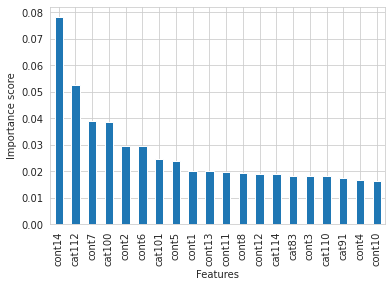

In [ ]:
ranked_feature_combine = pd.Series(model.feature_importances_,index = X.columns)
ranked_feature_combine.nlargest(20).plot(kind = 'bar')
plt.ylabel('Importance score')
plt.xlabel('Features')
plt.show

We got accuracy 0.55 and AUC=0.5 means model performs bad on dataset that means train and test are from different dataset.

# **Feature Engineering**

In [52]:
train_data = data_train.copy()
test_data = data_test.copy()

In [55]:
train_data['log_loss'] = lo
train_data = train_data.drop(['loss','id'],axis = 1)
train_data.head()

cat1 cat2 cat3 cat4 cat5  ...    cont11    cont12    cont13    cont14  log_loss
0    A    B    A    B    A  ...  0.569745  0.594646  0.822493  0.714843  7.735512
1    A    B    A    A    A  ...  0.338312  0.366307  0.611431  0.304496  7.214210
2    A    B    A    A    B  ...  0.381398  0.373424  0.195709  0.774425  8.032714
3    B    B    A    B    A  ...  0.327915  0.321570  0.605077  0.602642  6.922496
4    A    B    A    B    A  ...  0.204687  0.202213  0.246011  0.432606  7.951154

[5 rows x 131 columns]

### **Checking Mismatch levels in train and test set:**

In [57]:
'''
Here we will see any mismatch levels in respective categorical features.

E.g.  feature 'cat105' has unique levels ---> A,B,C  in train set
      and same feature has unique levels ---> A,D,C in test set.

so these kind of mismatch levels features we want to find if they are present.


This mainly happen because rarely occureance of levels.When we split data randomly then they might go any one side .


for example :  As we mention example above  there might be strong possibility that level B and D are very very rare in 'cat105' feature 
              so while sampling or random spliting into train-test they might present either side.So this mismatch happened.


We observed that in Train and Test set.And the reason behind this is mention above .


'''

mismatch_cat_features = []
for col in categorical_features_train:
  if (set(train_data[col].unique()) - set(test_data[col].unique())) or (set(test_data[col].unique()) - set(train_data[col].unique())):
    mismatch_cat_features.append(col)
print('Features that have mismatch of levels in train and test set are :',mismatch_cat_features)
print('Number of mismatch levels in categorical features are: ',len(mismatch_cat_features))

Features that have mismatch of levels in train and test set are : ['cat89', 'cat90', 'cat92', 'cat96', 'cat99', 'cat101', 'cat102', 'cat103', 'cat105', 'cat106', 'cat109', 'cat110', 'cat111', 'cat113', 'cat114', 'cat116']
Number of mismatch levels in categorical features are:  16


E.g.  feature 'cat105' has unique levels ---> A,B,C  in train set
      and same feature has unique levels ---> A,D,C in test set.

so these kind of mismatch levels features we want to find if they are present.


This mainly happen because rarely occureance of levels.When we split data randomly then they might go any one side .


for example :  As we mention example above  there might be strong possibility that level B and D are very very rare in 'cat105' feature 
              so while sampling or random spliting into train-test they might present either side.So this mismatch happened.


We observed that in Train and Test set.And the reason behind this is mention above .

**How Can we handle this:**
Simple way is to put 'NaN' if we found unknown level in test set.

Like 'cat101' has levels ---> A,B,C in train set and has levels ---> A,B,D.Now level D is present in test set but not in train set so level D is unknown.So we replace level D in with NaN.

So finally in test set 'cat101' has levels ---> A,B,NaN.

So we have to handle these NaN values in test set while Encoding categorical features.







**Handling mismatch levels in train-test set.**

In [58]:
def search_feature(x,combine_set):
  #print(combine_set)
  if x in combine_set:
      return np.nan
  return x

test_data_copy = test_data.copy()

for col in categorical_features_test:
  if (set(train_data[col].unique()) - set(test_data[col].unique())) or (set(test_data[col].unique()) - set(train_data[col].unique())) :
    #print('yes')
    unique_train = set(train_data[col].unique())
    unique_test = set(test_data[col].unique())
    rem_train = unique_train-unique_test
    rem_test = unique_test-unique_train
    #print('rem_train',rem_train)
    #print('rem_test',rem_test)
    combine_set = rem_train.union(rem_test)
    #print('combine_set',combine_set)
    mapp_nan = {i: np.nan for i in combine_set }
    #print( mapp_nan)
    #uniq_nan_testdf['cat92'] = uniq_nan_testdf['cat92'].map(mapp_nan)

    test_data_copy[col] = test_data_copy[col].apply(lambda x: search_feature(x,combine_set),1)

print('Number of NaN values in test set are : ', test_data_copy.isnull().sum().sum())

Number of NaN values in test set are :  45


**How this works with an example:**

In [71]:
print('In train set unique levels in cat92 features are : ',train_data['cat92'].unique())
print('In test set unique levels in cat92 features are : ',test_data['cat92'].unique())

print('levels present in train set but not in test set for cat92 feature are : ',set(train_data['cat92'].unique())-set(test_data['cat92'].unique()))
print('levels present in test set but not in train set (unknown levels) for cat92 feature are : ',set(test_data['cat92'].unique())-set(train_data['cat92'].unique()))


print('\nCount of levels in cat92 features in  train set: ',data_train.groupby(['cat92'])['id'].count().to_dict())

print('Count of levels in cat92 features in  test set: ',data_test.groupby(['cat92'])['id'].count().to_dict())


In train set unique levels in cat92 features are :  ['A' 'H' 'B' 'C' 'D' 'I' 'F']
In test set unique levels in cat92 features are :  ['A' 'H' 'B' 'C' 'G' 'I' 'D' 'E']
levels present in train set but not in test set for cat92 feature are :  {'F'}
levels present in test set but not in train set for cat92 feature are :  {'G', 'E'}

Count of levels in cat92 features in  train set:  {'A': 124689, 'B': 628, 'C': 62, 'D': 11, 'F': 1, 'H': 62901, 'I': 26}
Count of levels in cat92 features in  test set:  {'A': 83053, 'B': 448, 'C': 48, 'D': 2, 'E': 2, 'G': 1, 'H': 41969, 'I': 23}


In [83]:
test_data[test_data['cat92']=='E']

id cat1 cat2 cat3  ...    cont11    cont12    cont13    cont14
85976  403608    A    A    A  ...  0.711942  0.698722  0.605077  0.820876
90190  423295    A    A    A  ...  0.644013  0.630853  0.746494  0.211047

[2 rows x 131 columns]

In [84]:
test_data[test_data['cat92']=='G']

id cat1 cat2 cat3 cat4  ...   cont10    cont11    cont12    cont13    cont14
1769  8241    A    B    A    A  ...  0.71775  0.377724  0.369858  0.684242  0.544832

[1 rows x 131 columns]

Here in cat92 feature G and E are unknown feature in test set and it occurs 3 places in test set.

And we assigned them as 'Nan' .

In [72]:
test_data_copy[test_data_copy['cat92'].isnull()]

id cat1 cat2 cat3  ...    cont11    cont12    cont13    cont14
1769     8241    A    B    A  ...  0.377724  0.369858  0.684242  0.544832
85976  403608    A    A    A  ...  0.711942  0.698722  0.605077  0.820876
90190  423295    A    A    A  ...  0.644013  0.630853  0.746494  0.211047

[3 rows x 131 columns]

## **1. Target mean encoding** (simple mean encoding)

In [86]:
train_data_copy = train_data.copy()

In [87]:
simple_target_encoding_map = {i : train_data.groupby(i)['log_loss'].mean().to_dict() for i in categorical_features_train}

train_data_simple_target_en = train_data.copy()
global_mean = train_data_simple_target_en['log_loss'].mean()
for i in categorical_features_test:
  train_data_simple_target_en[i].fillna(global_mean, inplace = True) 
  train_data_simple_target_en[i] = train_data_simple_target_en[i].map(simple_target_encoding_map [i])

train_data_simple_target_en.head()


cat1      cat2      cat3  ...    cont13    cont14  log_loss
0  7.849787  7.965728  7.694055  ...  0.822493  0.714843  7.735512
1  7.849787  7.965728  7.694055  ...  0.611431  0.304496  7.214210
2  7.849787  7.965728  7.694055  ...  0.195709  0.774425  8.032714
3  7.370747  7.965728  7.694055  ...  0.605077  0.602642  6.922496
4  7.849787  7.965728  7.694055  ...  0.246011  0.432606  7.951154

[5 rows x 131 columns]

In [92]:
print('Frequency of levels in cat105 feature are : ',feature_count_dict['cat105'])
print('Simple target encoding map for cat105 feature are : ',simple_target_encoding_map['cat105'])

Frequency of levels in cat105 feature are :  {'A': 77, 'B': 5, 'C': 275, 'D': 12172, 'E': 76493, 'F': 62892, 'G': 20613, 'H': 11258, 'I': 2941, 'J': 694, 'K': 486, 'L': 145, 'M': 171, 'N': 64, 'O': 9, 'P': 15, 'Q': 4, 'R': 2, 'S': 1, 'T': 1}
Simple target encoding map for cat105 feature are :  {'A': 7.665492597165038, 'B': 7.153444573923804, 'C': 7.667592109806581, 'D': 7.623407722010663, 'E': 7.699545455033136, 'F': 7.7427251148703515, 'G': 7.760486376079594, 'H': 7.806945158510495, 'I': 7.989611274385099, 'J': 8.163392357029629, 'K': 8.098189483168293, 'L': 8.34088264335702, 'M': 8.273953860242559, 'N': 8.58120350774853, 'O': 8.452960758635065, 'P': 8.761198528822167, 'Q': 8.664261438900885, 'R': 9.097942149117763, 'S': 8.219379971764997, 'T': 10.848521997275164}


In [93]:
print('Number of NaN in simple mean target encoded train set are : ',train_data_simple_target_en.isnull().sum().sum())

Number of NaN in simple mean target encoded train set are :  0


How to transform Test data and handel NaN values in Test data?
1. One simple way is to remove all these null rows . Since we see we have around 45 null value so we can remove those by removing that entire row.

2. Other way is put globel mean i.e target mean inplace of NaN in test set.Since they are rarely occure levels and may be they are outliers so by replacing with mean we kept Nan(rare levels) inside the target distribution.

So we choosing second method.

In [98]:
test_data_copy.isnull().sum().sum()

45

In [100]:
test_data_simple_target_en = test_data_copy.copy()

global_mean = train_data_simple_target_en['log_loss'].mean()
for i in categorical_features_test:
  test_data_simple_target_en[i] = test_data_simple_target_en[i].map(simple_target_encoding_map [i])
  test_data_simple_target_en[i].fillna(global_mean, inplace = True) 

test_data_simple_target_en.head()

id      cat1      cat2      cat3  ...    cont11    cont12    cont13    cont14
0   4  7.849787  7.965728  7.694055  ...  0.377724  0.369858  0.704052  0.392562
1   6  7.849787  7.965728  7.694055  ...  0.689039  0.675759  0.453468  0.208045
2   9  7.849787  7.965728  7.694055  ...  0.245410  0.241676  0.258586  0.297232
3  12  7.849787  7.551212  7.694055  ...  0.348867  0.341872  0.592264  0.555955
4  15  7.370747  7.551212  7.694055  ...  0.359572  0.352251  0.301535  0.825823

[5 rows x 131 columns]

In [103]:
print('Numbers of NaN in test set are : ',test_data_simple_target_en.isnull().sum().sum())

Numbers of NaN in test set are :  0


In [109]:
#printing how we replace NaN in cat92 feature in test set present at location 90190,1769,85976 with mean of target in train set.

test_data_simple_target_en['cat92'].loc[[90190,1769,85976]]

90190    7.730819
1769     7.730819
85976    7.730819
Name: cat92, dtype: float64

In [127]:
print('Frequency of levels in cat105 feature are : ',feature_count_dict['cat105'])
print('Simple target encoding map for cat105 feature are : ',simple_target_encoding_map['cat105'])

Frequency of levels in cat105 feature are :  {'A': 77, 'B': 5, 'C': 275, 'D': 12172, 'E': 76493, 'F': 62892, 'G': 20613, 'H': 11258, 'I': 2941, 'J': 694, 'K': 486, 'L': 145, 'M': 171, 'N': 64, 'O': 9, 'P': 15, 'Q': 4, 'R': 2, 'S': 1, 'T': 1}
Simple target encoding map for cat105 feature are :  {'A': 7.665492597165038, 'B': 7.153444573923804, 'C': 7.667592109806581, 'D': 7.623407722010663, 'E': 7.699545455033136, 'F': 7.7427251148703515, 'G': 7.760486376079594, 'H': 7.806945158510495, 'I': 7.989611274385099, 'J': 8.163392357029629, 'K': 8.098189483168293, 'L': 8.34088264335702, 'M': 8.273953860242559, 'N': 8.58120350774853, 'O': 8.452960758635065, 'P': 8.761198528822167, 'Q': 8.664261438900885, 'R': 9.097942149117763, 'S': 8.219379971764997, 'T': 10.848521997275164}


Simple target mean encoding cause the problem of **overfitting**.

If we see in cat105 feature, level T and S occurs only once.we get mean encoded value as 10.84 and 8.21 which is quite far from target distribution .So model will try overfit .These rarely occured category levels might me outlier. level T is encoded as 10.84 which very far from target mean distribution i.e. 7.7.So we can considered as outlier.

So rare categories levels can cause overfitting problem.We can solve this problem with some regularization and k-fold regularization.

This[link text](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study) link will gives more details about regularization in target mean encoding. And we will implement this to our problem.


## 2. **Regulaized Target mean encoding**(K-fold regularization for mean encodings)


In [134]:
#https://medium.com/@pouryaayria/k-fold-target-encoding-dfe9a594874b
#https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study
#https://www.kaggle.com/vchoubey/random-forest-mean-encoding-for-app-channel


'''
Regularization:

label(c) = (pc∗nc + pglobal∗α)/(nc+α)

pc :  is a target mean for a category
nc : is a number of samples in a category
pglobal :  is a global target mean
α : is a regularisation parameter that can be viewed as a size of a category you can trust
'''

from sklearn.model_selection import KFold


def mean_train_encoding_trial(df, cols, target,global_target_mean,alpha):
    y_tr = df[target].values
    skf = KFold(5, shuffle = True, random_state=123)
    df_copy = df.copy()

    for col in cols:
        df[col + '_mean_encoded'] = np.nan


    for trn_ind , val_ind in skf.split(df,y_tr):
        x_tr, x_val =  df_copy.iloc[trn_ind], df_copy.iloc[val_ind]

        for col in cols:
            tr_mean = x_tr.groupby(col)[target].agg(['count','mean'])
            a = (tr_mean['count']*tr_mean['mean'])+(global_target_mean*alpha)
            b = (tr_mean['count'] + alpha)
            encoded = a/b
            mean = x_val[col].map(encoded)
            df_copy[col].iloc[val_ind] = mean
            df[col + '_mean_encoded'].iloc[val_ind] = mean

    prior = global_target_mean

    for col in cols:
        df_copy[col].fillna(prior, inplace = True) 
        df[col + '_mean_encoded'].fillna(prior, inplace = True) 
        
    return df_copy,df

In [135]:
y = train_data['log_loss']
global_target_mean = y.mean()
cols = categorical_features_train
target = 'log_loss'
alpha = 20
data_copy = train_data.copy()
final_df_train,df_train = mean_train_encoding_trial(data_copy, cols, target,global_target_mean,alpha)

print(final_df_train.head(5))
print(df_train.head(5))
#df_test  = mean_test_encoding(df_train, df_test, cols, target)

       cat1      cat2      cat3  ...    cont13    cont14  log_loss
0  7.730819  7.730819  7.730819  ...  0.822493  0.714843  7.735512
1  7.849484  7.959272  7.689386  ...  0.611431  0.304496  7.214210
2  7.851610  7.968151  7.696066  ...  0.195709  0.774425  8.032714
3  7.730819  7.730819  7.730819  ...  0.605077  0.602642  6.922496
4  7.730819  7.730819  7.730819  ...  0.246011  0.432606  7.951154

[5 rows x 131 columns]
  cat1 cat2 cat3  ... cat114_mean_encoded cat115_mean_encoded cat116_mean_encoded
0    A    B    A  ...            7.730819            7.730819            7.730819
1    A    B    A  ...            7.814960            7.709027            7.712251
2    A    B    A  ...            7.819250            7.713552            7.668005
3    B    B    A  ...            7.730819            7.730819            7.730819
4    A    B    A  ...            7.730819            7.730819            7.730819

[5 rows x 247 columns]


In [136]:
print('Numver of NaN in regularized target encoded train set are : ',final_df_train.isnull().sum().sum())

Numver of NaN in regularized target encoded train set are :  0


In [137]:
'''
Mapping dict for categories level's which will help to transform or encodedtest set.
'''
target_encoding_map = {col : df_train.groupby(col)[col + '_mean_encoded'].mean().to_dict() for col in categorical_features_train}

print('Target mapping dict for cat105 is : ',target_encoding_map['cat105'])
print('Frquency of levels in cat105 feature are : ',feature_count_dict['cat105'])

Target mapping dict for cat105 is :  {'A': 7.720538296512796, 'B': 7.681187835600646, 'C': 7.689150428569989, 'D': 7.646011541213663, 'E': 7.704562691635096, 'F': 7.7370182510341605, 'G': 7.765008559795159, 'H': 7.802727451584675, 'I': 7.952210169859268, 'J': 8.07351612897538, 'K': 8.015191814414559, 'L': 8.150464117971534, 'M': 8.042789816221008, 'N': 8.138290001729299, 'O': 7.778963504612171, 'P': 7.868725894848704, 'Q': 7.816530288063507, 'R': 7.736244660589415, 'S': 7.7308194499385525, 'T': 7.7308194499385525}
Frquency of levels in cat105 feature are :  {'A': 77, 'B': 5, 'C': 275, 'D': 12172, 'E': 76493, 'F': 62892, 'G': 20613, 'H': 11258, 'I': 2941, 'J': 694, 'K': 486, 'L': 145, 'M': 171, 'N': 64, 'O': 9, 'P': 15, 'Q': 4, 'R': 2, 'S': 1, 'T': 1}


In [138]:
'''

Since we have NaN in test set so we will assign mean of target in train set.

So here we will make mapping dict with consideration of NaN in each categorical features.
'''

target_encoding_map_with_nan = {}

for col in categorical_features_train:
  z = df_train.groupby(col)[col + '_mean_encoded'].mean().to_dict()
  z[np.nan] = global_target_mean
  target_encoding_map_with_nan[col] = z


In [139]:
print(target_encoding_map_with_nan['cat105'])
print(feature_count_dict['cat105'])

{'A': 7.720538296512796, 'B': 7.681187835600646, 'C': 7.689150428569989, 'D': 7.646011541213663, 'E': 7.704562691635096, 'F': 7.7370182510341605, 'G': 7.765008559795159, 'H': 7.802727451584675, 'I': 7.952210169859268, 'J': 8.07351612897538, 'K': 8.015191814414559, 'L': 8.150464117971534, 'M': 8.042789816221008, 'N': 8.138290001729299, 'O': 7.778963504612171, 'P': 7.868725894848704, 'Q': 7.816530288063507, 'R': 7.736244660589415, 'S': 7.7308194499385525, 'T': 7.7308194499385525, nan: 7.7308194499385525}
{'A': 77, 'B': 5, 'C': 275, 'D': 12172, 'E': 76493, 'F': 62892, 'G': 20613, 'H': 11258, 'I': 2941, 'J': 694, 'K': 486, 'L': 145, 'M': 171, 'N': 64, 'O': 9, 'P': 15, 'Q': 4, 'R': 2, 'S': 1, 'T': 1}


Here in mapping dict of levels we will see rare categories i.e. S,T,R are mapped or encoded as 7.73 which is very closed to mean target value.So by that we mostly avoid overfitting.

**Transform/Encoded Test set**

In [140]:
final_df_test = test_data_copy.copy()
for i,col in enumerate(categorical_features_test):
  final_df_test[col] =  final_df_test[col].map(target_encoding_map_with_nan[col])

final_df_test.head()

id      cat1      cat2      cat3  ...    cont11    cont12    cont13    cont14
0   4  7.826634  7.918012  7.701126  ...  0.377724  0.369858  0.704052  0.392562
1   6  7.826634  7.918012  7.701126  ...  0.689039  0.675759  0.453468  0.208045
2   9  7.826634  7.918012  7.701126  ...  0.245410  0.241676  0.258586  0.297232
3  12  7.826634  7.587757  7.701126  ...  0.348867  0.341872  0.592264  0.555955
4  15  7.442273  7.587757  7.701126  ...  0.359572  0.352251  0.301535  0.825823

[5 rows x 131 columns]

In [141]:
print('Number of NaN in encoded test set are : ',final_df_test.isnull().sum().sum())

Number of NaN in encoded test set are :  0


## 3. **Target mean encoding with 'category_encoders' library**

In [142]:
!pip install category_encoders

     |████████████████████████████████| 81kB 1.2MB/s 


In [143]:
X_tri = train_data.copy()
y_tri = train_data['log_loss']

In [144]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols = categorical_features_train,return_df=True,min_samples_leaf=15)

encoded = encoder.fit_transform(X_tri,y_tri)

encoded.head()

cat1      cat2      cat3  ...    cont13    cont14  log_loss
0  7.849787  7.965728  7.694055  ...  0.822493  0.714843  7.735512
1  7.849787  7.965728  7.694055  ...  0.611431  0.304496  7.214210
2  7.849787  7.965728  7.694055  ...  0.195709  0.774425  8.032714
3  7.370747  7.965728  7.694055  ...  0.605077  0.602642  6.922496
4  7.849787  7.965728  7.694055  ...  0.246011  0.432606  7.951154

[5 rows x 131 columns]

In [154]:
print('Number of NaN in encoded train set are : ',encoded.isnull().sum().sum())

Number of NaN in encoded train set are :  0


In [149]:
X_tes =test_data_copy.copy()

encoded_test = encoder.transform(X_tes)
encoded_test.head()

id      cat1      cat2      cat3  ...    cont11    cont12    cont13    cont14
0   4  7.849787  7.965728  7.694055  ...  0.377724  0.369858  0.704052  0.392562
1   6  7.849787  7.965728  7.694055  ...  0.689039  0.675759  0.453468  0.208045
2   9  7.849787  7.965728  7.694055  ...  0.245410  0.241676  0.258586  0.297232
3  12  7.849787  7.551212  7.694055  ...  0.348867  0.341872  0.592264  0.555955
4  15  7.370747  7.551212  7.694055  ...  0.359572  0.352251  0.301535  0.825823

[5 rows x 131 columns]

In [153]:
#checking does we handle NaN in test set while encoding
encoded_test['cat92'].loc[90190]

7.7308194499385525

In [155]:
print('Number of NaN in test set are : ',encoded_test.isnull().sum().sum())

Number of NaN in test set are :  0


Here we done with Target mean encoding.This is one of the good encoding schem.

We have other categorical encoder such as:

1. **One Hot Encoder** : this is one of most used and popular Encoding technique.In Our dataset we have some of high cardinal categorical feature. for example cat116 feature has 326 levels.And if we transformed them using one hot encoder then we get 1139 features for categorical and we have 16 continuous fature. We get high dimensional data which is sparse in nature.So if we use tree based algorithm then it will take more time to converge and takes more splits to predict target.So we can avoid that thing.

2. **Label Encoding and frequency encoding**: This is also very popular algorithm and very simple.Here unique lable assigned to each level in categorical feature.But Here problem is Label assigned randomly no categorical order is preserved. So we introduce Frequency encoding where most frequent lavel will assign high number.So in that order we give more importance to highly frequent levels. But if frequency count tied with other level then there is problem.

3. **Target Encoding**: Which we applied.Here we encode each level with mean of target variable . Here we keep dependency of levels with target.Which is use full while modeling.We should use regularized target encoding to avoid overfitting due to very rare levels in categories.

## **2. Ferquency encoding + Target mean encoding**

Now we seen we have some categorical feature with low cardinality and some vary high cardinality.

So we can do frequency label encoding for low cardinal features and target encoding for high cardinal features.

So we choose upto 4 levels feature are for label encoding and beyond 4 level for target encoding.

In [156]:
greatrer_than_4_levels_features = []
less_than_4_levels_features = []
for col in categorical_features_train:
  cnt = len(feature_count_dict[col])
  if cnt > 4:
    greatrer_than_4_levels_features.append(col)
  else:
    less_than_4_levels_features.append(col)
print('Greatrer than 4 levels features are : ',greatrer_than_4_levels_features)
print('Numers of features that have levels more than 4 are : ',len(greatrer_than_4_levels_features))

Greatrer than 4 levels features are :  ['cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114', 'cat115', 'cat116']
Numers of features that have levels more than 4 are :  28


In our date set we have 28 categorical features whoose contain levels more than 4.So these feature we can considered as high cardinal features. And will Target encoding on them and on remaining 88 categorical features we do label encoding.

In [160]:
'''
Here we will generate unique labels on levels for categorical features.

E.g. let 'cat1' feature has 4 levels with frequency are A>C>B>D. that is A has occured more time so will 
      assigned highest label to A level. After encoding we get  D:0,B:1,C:2,A:4. This way we will assigned labels.

      Since we have NaN in test set so we have handle that as well.We will assigned -1 label to nan. 

Like wise we will create dictionary for each categorical features whose levels are upto 4.

'''

less_than_4_level_dict_map_with_nan={}
for col in less_than_4_levels_features:
  z = {k: i for i, k in enumerate(data_train.groupby([col])['id'].count().sort_values().index)}
  z[np.nan] = -1
  less_than_4_level_dict_map_with_nan[col]=z


In [162]:
print('Mapping dict for label encoding on feature cat88 are: ',less_than_4_level_dict_map_with_nan['cat88'])

Mapping dict for label encoding on feature cat88 are:  {'B': 0, 'E': 1, 'D': 2, 'A': 3, nan: -1}


In [163]:
'''
Target encoding for high cardinal features as we do above.
'''

y = train_data['log_loss']
global_target_mean = y.mean()
cols = greatrer_than_4_levels_features
target = 'log_loss'
alpha = 20
data_copy = train_data.copy()
target_encoded_morethan_4_level,df_targ_en = mean_train_encoding_trial(data_copy, cols, target,global_target_mean,alpha)

#target_encoding_map_morethan_4_level = {col : df_targ_en.groupby(col)[col + '_mean_encoded'].mean().to_dict() for col in greatrer_than_4_levels_features}

print(target_encoded_morethan_4_level.head())
print(df_targ_en.head())

#print(target_encoding_map_morethan_4_level)

  cat1 cat2 cat3 cat4 cat5  ...    cont11    cont12    cont13    cont14  log_loss
0    A    B    A    B    A  ...  0.569745  0.594646  0.822493  0.714843  7.735512
1    A    B    A    A    A  ...  0.338312  0.366307  0.611431  0.304496  7.214210
2    A    B    A    A    B  ...  0.381398  0.373424  0.195709  0.774425  8.032714
3    B    B    A    B    A  ...  0.327915  0.321570  0.605077  0.602642  6.922496
4    A    B    A    B    A  ...  0.204687  0.202213  0.246011  0.432606  7.951154

[5 rows x 131 columns]
  cat1 cat2 cat3  ... cat114_mean_encoded cat115_mean_encoded cat116_mean_encoded
0    A    B    A  ...            7.730819            7.730819            7.730819
1    A    B    A  ...            7.814960            7.709027            7.712251
2    A    B    A  ...            7.819250            7.713552            7.668005
3    B    B    A  ...            7.730819            7.730819            7.730819
4    A    B    A  ...            7.730819            7.730819            7

In [164]:
'''
Here we create mapping dict for target encoded features with NaN consideration.

So we first created mapping dict for label encoder and target encoder. Then we apply this on train and test data.
'''

target_encoding_map_morethan_4_level_with_nan = {}
for col in greatrer_than_4_levels_features:
  z =  df_targ_en.groupby(col)[col + '_mean_encoded'].mean().to_dict()
  z[np.nan] = global_target_mean
  target_encoding_map_morethan_4_level_with_nan[col] = z

In [165]:
print('Target encoded level mapping for cat105 feature are : ',target_encoding_map_morethan_4_level_with_nan['cat105'])

Target encoded level mapping for cat105 feature are :  {'A': 7.720538296512796, 'B': 7.681187835600646, 'C': 7.689150428569989, 'D': 7.646011541213663, 'E': 7.704562691635096, 'F': 7.7370182510341605, 'G': 7.765008559795159, 'H': 7.802727451584675, 'I': 7.952210169859268, 'J': 8.07351612897538, 'K': 8.015191814414559, 'L': 8.150464117971534, 'M': 8.042789816221008, 'N': 8.138290001729299, 'O': 7.778963504612171, 'P': 7.868725894848704, 'Q': 7.816530288063507, 'R': 7.736244660589415, 'S': 7.7308194499385525, 'T': 7.7308194499385525, nan: 7.7308194499385525}


In [168]:
'''
Here we applying Label encoding for lower cardinal features.So we wil get complete encoding.
'''

final_label_plus_target_endode =target_encoded_morethan_4_level.copy() 
for col in less_than_4_levels_features:
  final_label_plus_target_endode[col] = final_label_plus_target_endode[col].map(less_than_4_level_dict_map_with_nan[col])

In [169]:
final_label_plus_target_endode.head()

cat1  cat2  cat3  cat4  ...    cont12    cont13    cont14  log_loss
0     1     0     1     0  ...  0.594646  0.822493  0.714843  7.735512
1     1     0     1     1  ...  0.366307  0.611431  0.304496  7.214210
2     1     0     1     1  ...  0.373424  0.195709  0.774425  8.032714
3     0     0     1     0  ...  0.321570  0.605077  0.602642  6.922496
4     1     0     1     0  ...  0.202213  0.246011  0.432606  7.951154

[5 rows x 131 columns]

In [170]:
print('Number of NaN after encoding train set are :',final_label_plus_target_endode.isnull().sum().sum())

Number of NaN after encoding train set are : 0


**Transform / Encoding of Test data**

In [178]:
def test_label_plus_target_encoding(test_data,greatrer_than_4_levels_features,less_than_4_levels_features,target_encoding_map_morethan_4_level_with_nan,less_than_4_level_dict_map_with_nan):

  for col in greatrer_than_4_levels_features:
    test_data[col] = test_data[col].map(target_encoding_map_morethan_4_level_with_nan[col])

  for col in less_than_4_levels_features:
    test_data[col] = test_data[col].map(less_than_4_level_dict_map_with_nan[col])

  #final_test_data = test_data.drop(greatrer_than_4_levels_features,axis = 1)

  return test_data




In [179]:
test_data = test_data_copy.copy()
final_test_data = test_label_plus_target_encoding(test_data,greatrer_than_4_levels_features,
                                                  less_than_4_levels_features,
                                                  target_encoding_map_morethan_4_level_with_nan,
                                                  less_than_4_level_dict_map_with_nan)

final_test_data.head()

id  cat1  cat2  cat3  cat4  ...   cont10    cont11    cont12    cont13    cont14
0   4     1     0     1     1  ...  0.38016  0.377724  0.369858  0.704052  0.392562
1   6     1     0     1     0  ...  0.60401  0.689039  0.675759  0.453468  0.208045
2   9     1     0     1     0  ...  0.30529  0.245410  0.241676  0.258586  0.297232
3  12     1     1     1     1  ...  0.31480  0.348867  0.341872  0.592264  0.555955
4  15     0     1     1     1  ...  0.50556  0.359572  0.352251  0.301535  0.825823

[5 rows x 131 columns]

In [182]:
print('Number of NaN in encoded test data are : ',final_test_data.isnull().sum().sum())

Number of NaN in encoded test data are :  0


These are some methods were we can handle categorical data.

Some important points:
1. Rare categorical levels can cause overfitting in target encoding.So we must use regularization on target encoding.

2. We should first do splitting data into train-test and then do any kind of encoding.By this way we can avoid data leakge problem.

3. Since we have many outliers in target variable so we need do proper hyperparameter tunning for models.

4. For continuous feature we tried with multiple transformation technique but no change in distribution.

5. All Continuous features lies between 0 and 1, So we can say they are already scaled.So we will use Continuous data as it is.

